## Logistic regression model - Lead Scoring

## Case Study Objective
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

#### <font color=brown>You are required to prepare a model that will assign a lead score to each of the leads such that the 
 #### <font color=brown>customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower 
 #### <font color=brown>conversion chance. 

### Step1: Import the libraries and the dataset

In [361]:
#Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# list all the columns
pd.options.display.max_columns = None

# list all the rows
pd.options.display.max_rows = None

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

# ROC Curve libraries
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# import library for Confusion Matrix
from sklearn.metrics import confusion_matrix

# import precision recall curve library

from sklearn.metrics import precision_recall_curve

#import
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [362]:
# Import the dataset
x_org = pd.read_csv('Leads.csv')
x_org.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [363]:
# Check the shape
x_org.shape

(9240, 37)

In [364]:
#verify the information of the columns
x_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [365]:
# Validate the statistics of the numerical columns

x_org.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.0000,9240,9204,9240,9240,9240.0000,9103.0000,9240.0000,9103.0000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.0000,5022.0000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,6ba33f3d-08ff-4939-9e8e-d078fbd251fb,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.4356,NaN,NaN,NaN,NaN,0.3854,3.4452,487.6983,2.3628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.3063,16.3449,NaN,NaN,NaN
std,NaN,23405.9957,NaN,NaN,NaN,NaN,0.4867,4.8549,548.0215,2.1614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3867,1.8114,NaN,NaN,NaN
min,NaN,579533.0000,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0000,11.0000,NaN,NaN,NaN
25%,NaN,596484.5000,NaN,NaN,NaN,NaN,0.0000,1.0000,12.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0000,15.0000,NaN,NaN,NaN
50%,NaN,615479.0000,NaN,NaN,NaN,NaN,0.0000,3.0000,248.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0000,16.0000,NaN,NaN,NaN
75%,NaN,637387.2500,NaN,NaN,NaN,NaN,1.0000,5.0000,936.0000,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0000,18.0000,NaN,NaN,NaN


#### Observation: 
1. We can observe lot of Na values already
2. There are some columns/categorical variables having label as 'Select' ,implies that the customer was not selected any option Therefore, we will replace it with null value.

### Step2: Cleaning the dataset

In [366]:
x_org.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<font color=brown>Validating in perecentage, any columns that has missing value percentage > 30%,it is better to remove them because it is not a considered good for the prediction model
if we impute values where more than 30% of data is based on predictions and assumptions.

Before that we have to replace, "Select" as "Null values".

In [367]:
# Select all non-numeric columns
x_obj = x_org.select_dtypes(include='object')

In [368]:
# Search columns that contain term "Select"
x = lambda x: x.str.contains('Select', na=False)
y = x_obj.columns[x_obj.apply(x).any()].tolist()
print(y)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


#### Observation: We can figure out that there are 4 colums where "Select" can be changed to null values.

In [369]:
# select all the columns that have a "Select" entry
x_org_select = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# replace values
x_org[x_org_select] = x_org[x_org_select].replace('Select', np.NaN)

In [370]:
# Calculate null percentage values for each column
round(x_org.isnull().sum()/len(x_org)*100,2)

Prospect ID                                      0.0000
Lead Number                                      0.0000
Lead Origin                                      0.0000
Lead Source                                      0.3900
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
TotalVisits                                      1.4800
Total Time Spent on Website                      0.0000
Page Views Per Visit                             1.4800
Last Activity                                    1.1100
Country                                         26.6300
Specialization                                  36.5800
How did you hear about X Education              78.4600
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                           0.0000
Magazine                                        

In [371]:
(x_org["Lead Profile"]).head()

0               NaN
1               NaN
2    Potential Lead
3               NaN
4               NaN
Name: Lead Profile, dtype: object

In [372]:
# Drop Columns having null values > 37% 

x_cols=x_org.isnull().sum()
x_cols=x_cols[x_cols.values/len(x_org)>0.37]
len(x_cols)

8

In [373]:
#drop the columns
x_drop=list(x_cols.keys())
x_org=x_org.drop(x_drop,1) 

#revalidate the null % count
round(x_org.isnull().sum()/len(x_org)*100,2)

Prospect ID                                      0.0000
Lead Number                                      0.0000
Lead Origin                                      0.0000
Lead Source                                      0.3900
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
TotalVisits                                      1.4800
Total Time Spent on Website                      0.0000
Page Views Per Visit                             1.4800
Last Activity                                    1.1100
Country                                         26.6300
Specialization                                  36.5800
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                           0.0000
Magazine                                         0.0000
Newspaper Article                               

In [374]:
x_org.shape

(9240, 29)

#### Let us start clearing null values and imputing them one by one for columns

In [375]:
# Begin with Lead Score Column: Checking Value counts

x_org['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
blog                    1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [376]:
#replacing Nan Values and combining low frequency values
x_org['Lead Source'] = x_org['Lead Source'].replace(np.nan,'Others')
x_org['Lead Source'] = x_org['Lead Source'].replace('google','Google')
x_org['Lead Source'] = x_org['Lead Source'].replace('Facebook','Social Media')
x_org['Lead Source'] = x_org['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')  

In [377]:
# Total Visits Column: Checking Value counts

x_org['TotalVisits'].value_counts()

0.0000      2189
2.0000      1680
3.0000      1306
4.0000      1120
5.0000       783
6.0000       466
1.0000       395
7.0000       309
8.0000       224
9.0000       164
10.0000      114
11.0000       86
13.0000       48
12.0000       45
14.0000       36
16.0000       21
15.0000       18
17.0000       16
18.0000       15
20.0000       12
19.0000        9
21.0000        6
23.0000        6
25.0000        5
24.0000        5
27.0000        5
22.0000        3
28.0000        2
29.0000        2
26.0000        2
115.0000       1
41.0000        1
55.0000        1
251.0000       1
141.0000       1
32.0000        1
42.0000        1
74.0000        1
43.0000        1
30.0000        1
54.0000        1
Name: TotalVisits, dtype: int64

In [378]:
x_org['TotalVisits'].median()

#replace na values with median

3.0

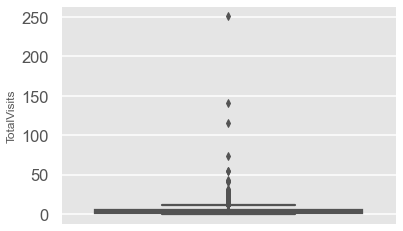

In [379]:
#Box Plot for the column
sns.boxplot(y=x_org['TotalVisits'])
plt.show()

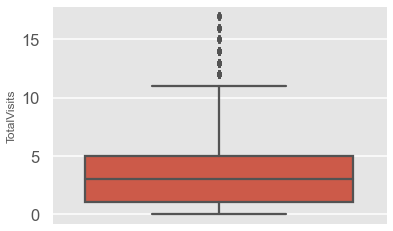

In [380]:
#Removing top and bottom of the outliers.
Quater3 = x_org.TotalVisits.quantile(0.99)
x_org = x_org[(x_org.TotalVisits <= Quater3)]
Quater1 = x_org.TotalVisits.quantile(0.01)
x_org = x_org[(x_org.TotalVisits >= Quater1)]

sns.boxplot(y=x_org['TotalVisits'])
plt.show()

In [381]:
x_org.TotalVisits.fillna(x_org.TotalVisits.median(), inplace=True)
x_org.TotalVisits = x_org.TotalVisits.astype('int')

In [382]:
# Country Column: Checking Value counts

x_org['Country'].value_counts(dropna=False)

India                   6412
NaN                     2324
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
Canada                     4
South Africa               4
unknown                    4
Germany                    4
Nigeria                    4
Sweden                     3
Bangladesh                 2
Asia/Pacific Region        2
Uganda                     2
Philippines                2
Belgium                    2
China                      2
Netherlands                2
Italy                      2
Ghana                      2
Vietnam                    1
Russia                     1
Malaysia                   1
Kenya                      1
Tanzania                   1
Sri Lanka     

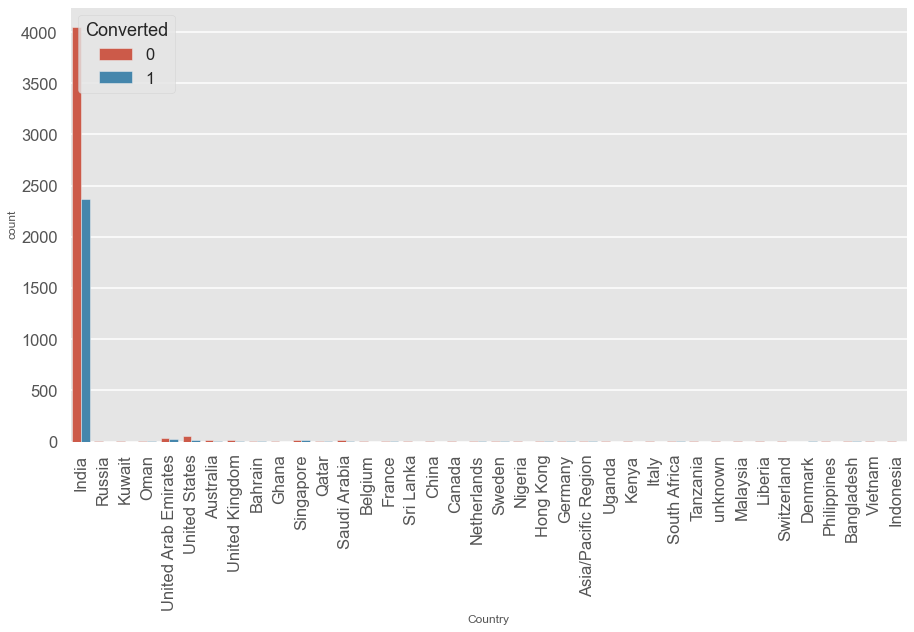

In [383]:
#Visualization Country columnn 
plt.figure(figsize=(15,8))
s1=sns.countplot(x_org.Country, hue=x_org.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [384]:
# Replace non-missing values with India

x_org['Country'] = x_org['Country'].replace(np.nan,'India')

In [385]:
#What is your current occupation Column: Checking Value counts

x_org['Specialization'].value_counts(dropna=False)

NaN                                  3293
Finance Management                    954
Human Resource Management             826
Marketing Management                  819
Operations Management                 498
Business Administration               393
IT Projects Management                363
Supply Chain Management               343
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
Healthcare Management                 152
E-COMMERCE                            110
Hospitality Management                109
Retail Management                      97
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

In [386]:
#Since, there are too manu null values, and it is a significant variavle; we will replace NaN with "Null specified"
x_org['Specialization'] = x_org['Specialization'].replace(np.nan,'Null_specified')

In [387]:
#What is your current occupation Column: Checking Value counts

x_org['What is your current occupation'].value_counts(dropna=False)

Unemployed              5447
NaN                     2665
Working Professional     672
Student                  206
Other                     13
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [388]:
#Replacing Nan values with "Unmeployed"

x_org['What is your current occupation'] = x_org['What is your current occupation'].replace(np.nan, 'Unemployed')

In [389]:
#Validate the data in the column
x_org['What is your current occupation'].value_counts(dropna=False)

Unemployed              8112
Working Professional     672
Student                  206
Other                     13
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [390]:
#What matters most to you in choosing a course colum: Checking Value counts

x_org['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6335
NaN                          2683
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [391]:
#Replacing Nan values with "Better Career Prospects"

x_org['What matters most to you in choosing a course'] = x_org['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [392]:
x_org['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9018
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

#### Imp Note: We will be dropping columns which are provided by the sales team and we create model creation on the "Source" or Raw data only.
Hence, dropping columns - <font color=brown>You Tags, Last Activity , Last Notable Activity. 

In [393]:
# creating a list of the column names to be dropped
drop_col = ["Tags", "Last Activity" , "Last Notable Activity","Prospect ID"]

#drop cols

for i in drop_col:
    x_org = x_org.drop([i] , axis = 1 )
    
x_org.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0,0,0.0000,India,Null_specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
1,660728,API,Organic Search,No,No,0,5,674,2.5000,India,Null_specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0000,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0000,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
4,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0000,India,Null_specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No


In [394]:
#revalidate the null % count
round(x_org.isnull().sum()/len(x_org)*100,2)

Lead Number                                     0.0000
Lead Origin                                     0.0000
Lead Source                                     0.0000
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
TotalVisits                                     0.0000
Total Time Spent on Website                     0.0000
Page Views Per Visit                            0.0000
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper Article                               0.0000
X Education Forums                              0.0000
Newspaper                                       0.0000
Digital Ad

### Checkpoint: All the columns are free of null values, we can proceed with further analysis

### Step3: Exploaratory Data Analysis

### 3.1 Univariate Analysis

In [395]:
x_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9020 non-null   int64  
 1   Lead Origin                                    9020 non-null   object 
 2   Lead Source                                    9020 non-null   object 
 3   Do Not Email                                   9020 non-null   object 
 4   Do Not Call                                    9020 non-null   object 
 5   Converted                                      9020 non-null   int64  
 6   TotalVisits                                    9020 non-null   int32  
 7   Total Time Spent on Website                    9020 non-null   int64  
 8   Page Views Per Visit                           9020 non-null   float64
 9   Country                                        9020 

#### 3.1.1 Categorical Variables

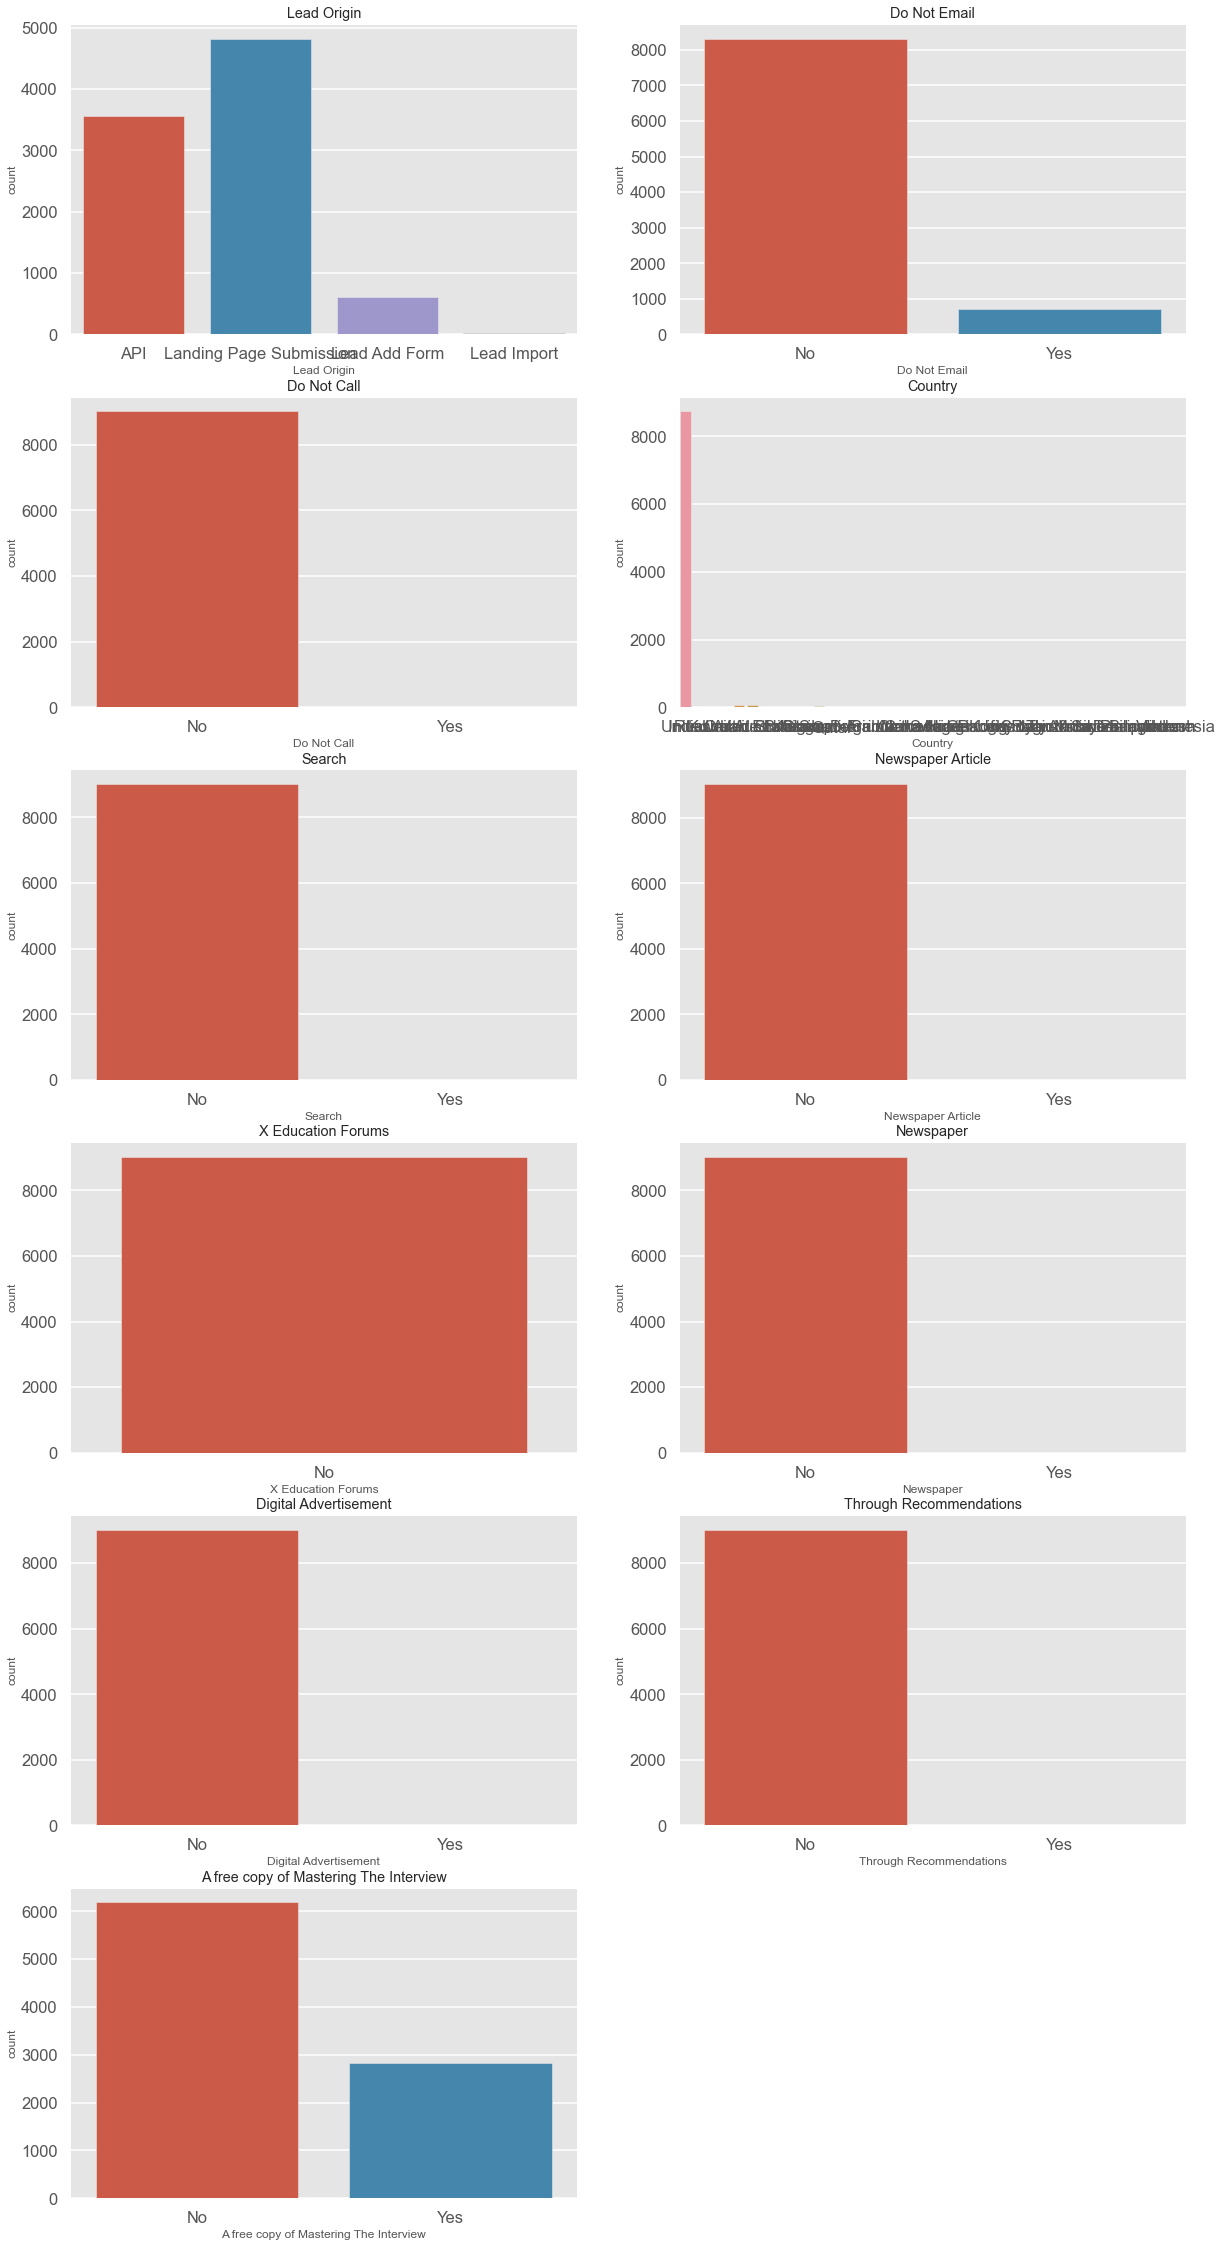

In [396]:
#Plot Analysis
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x_org['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x_org['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x_org['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x_org['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(x_org['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(x_org['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(x_org['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(x_org['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(x_org['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(x_org['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(x_org['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')



plt.show()

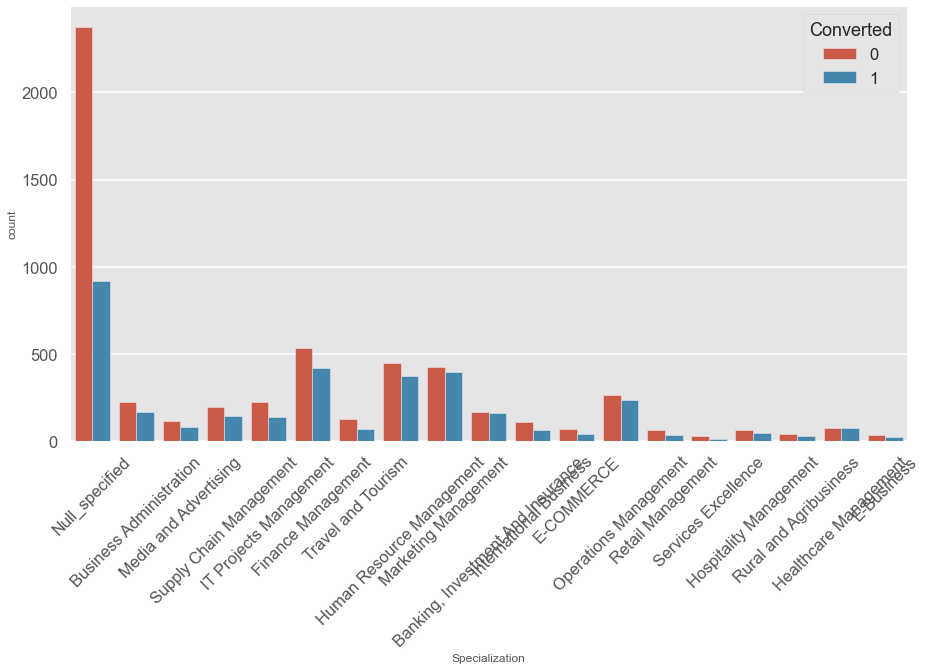

In [397]:
# Specialization column

plt.figure(figsize=(15,8))
s1=sns.countplot(x_org.Specialization, hue=x_org.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Observation: We can observe that courses with "Management" have higher number of leads, and a better conversion rate as well,hence we can combine the data to make this varible more significant

In [398]:
#Aggregate Management Specializations courses

x_org['Specialization'] = x_org['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

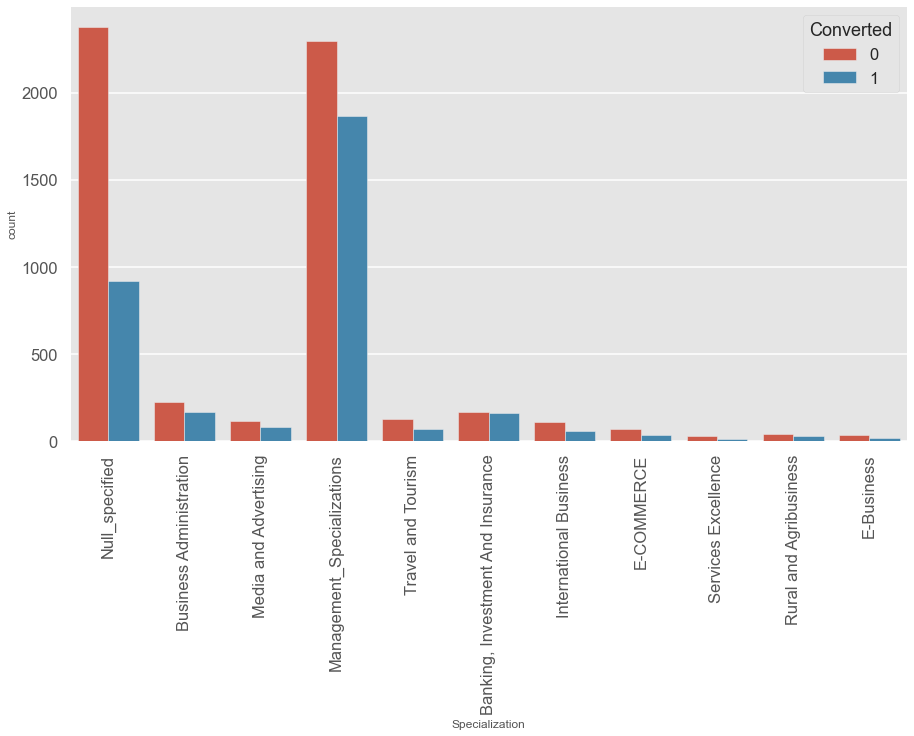

In [399]:
# Specialization column recheck

plt.figure(figsize=(15,8))
s1=sns.countplot(x_org.Specialization, hue=x_org.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

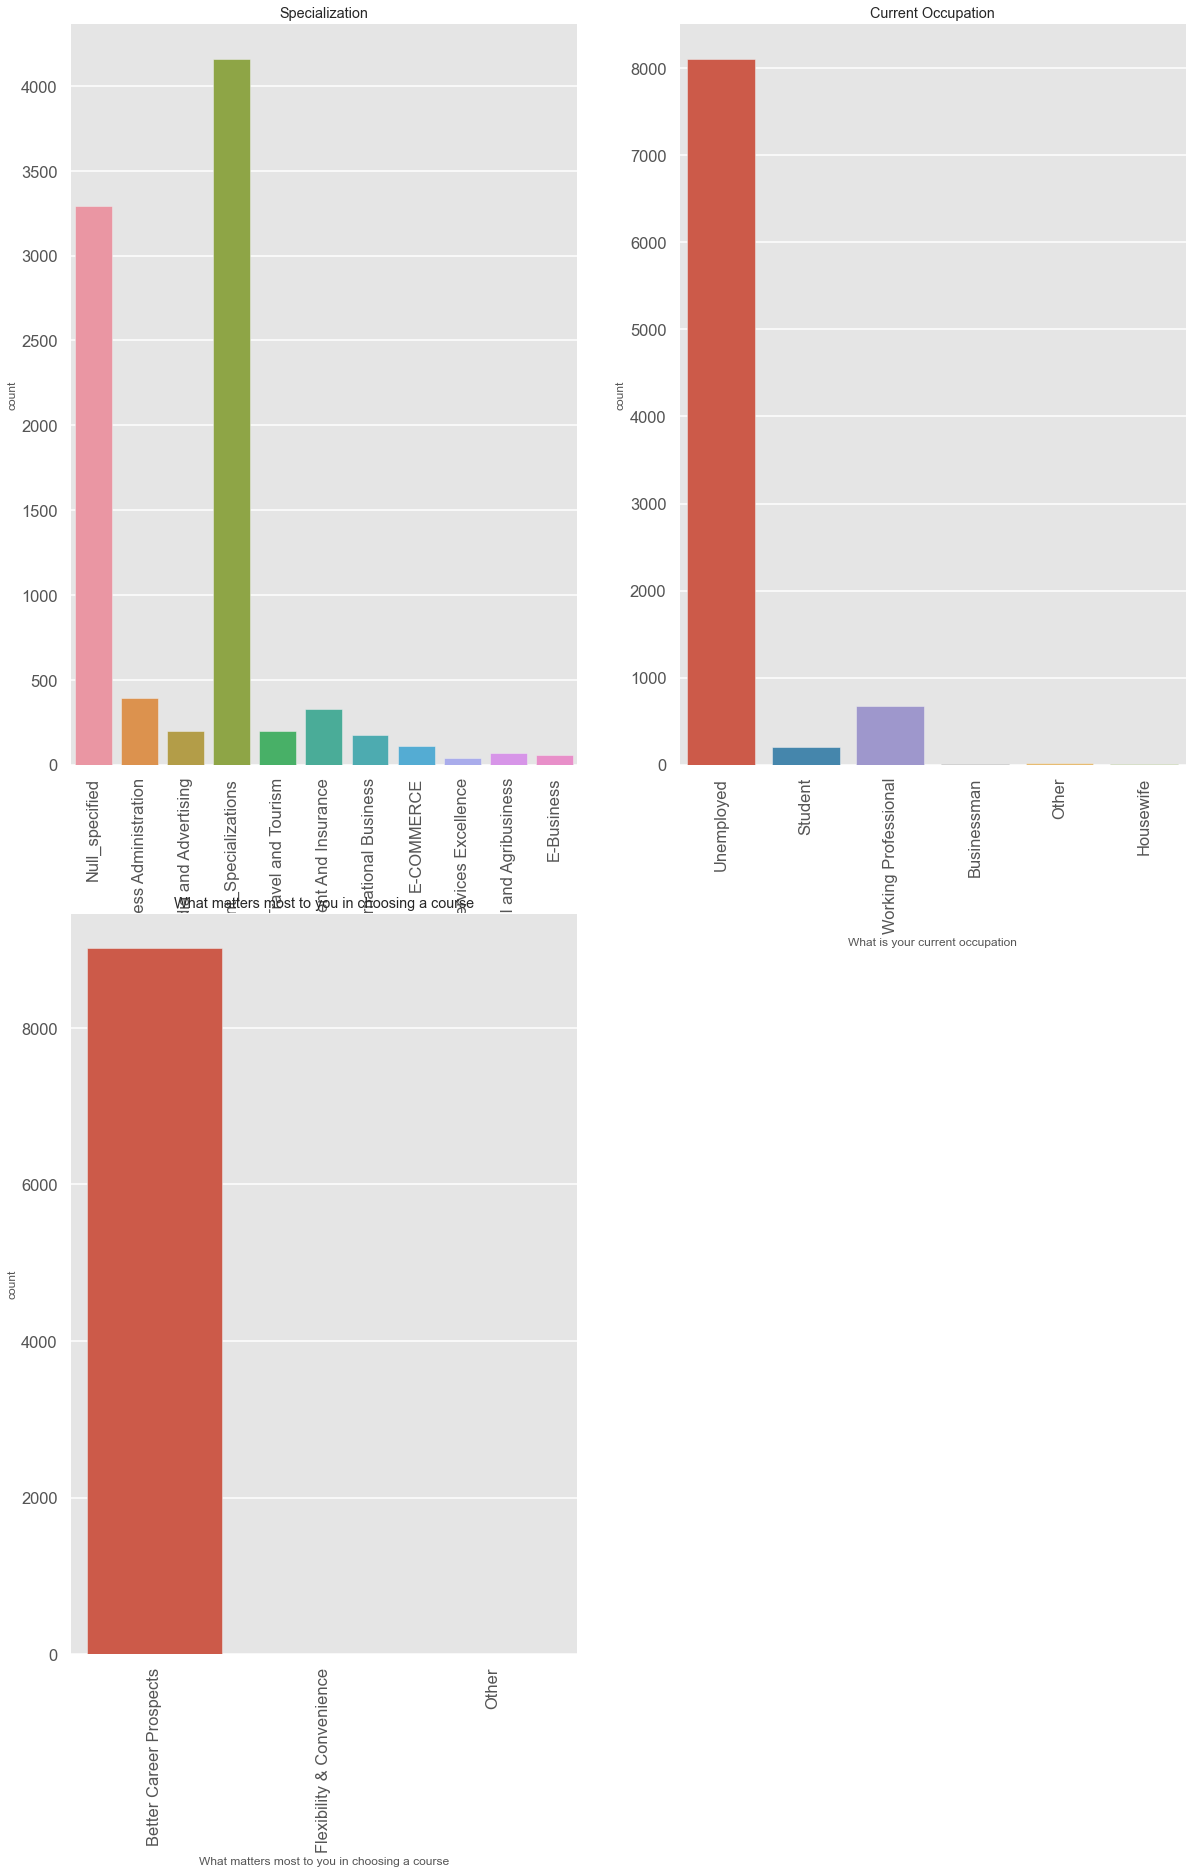

In [400]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(x_org['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(x_org['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(x_org['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.show()

#### Inference: Most of them are uemplopyed and looking for a better career prospect.

### 3.1.2 Numerical Variables

In [401]:
x_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9020 non-null   int64  
 1   Lead Origin                                    9020 non-null   object 
 2   Lead Source                                    9020 non-null   object 
 3   Do Not Email                                   9020 non-null   object 
 4   Do Not Call                                    9020 non-null   object 
 5   Converted                                      9020 non-null   int64  
 6   TotalVisits                                    9020 non-null   int32  
 7   Total Time Spent on Website                    9020 non-null   int64  
 8   Page Views Per Visit                           9020 non-null   float64
 9   Country                                        9020 

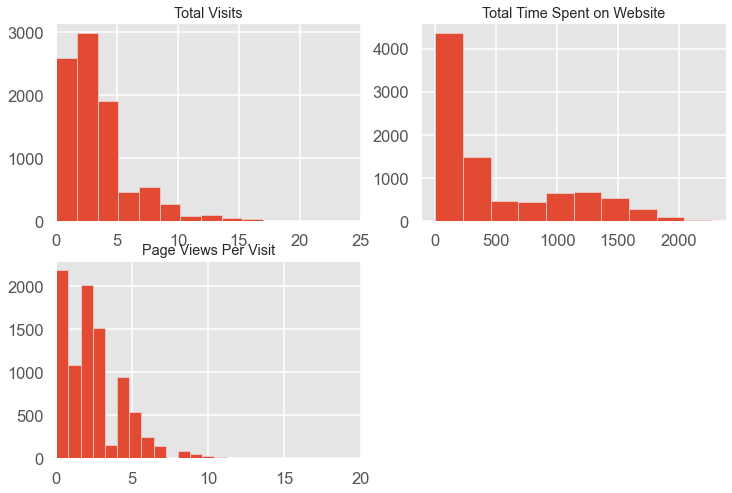

In [402]:
# Analysing time spent on the website
plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(x_org['TotalVisits'], bins = 10)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(x_org['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(x_org['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 3.1.3 Checking for possible Outliers

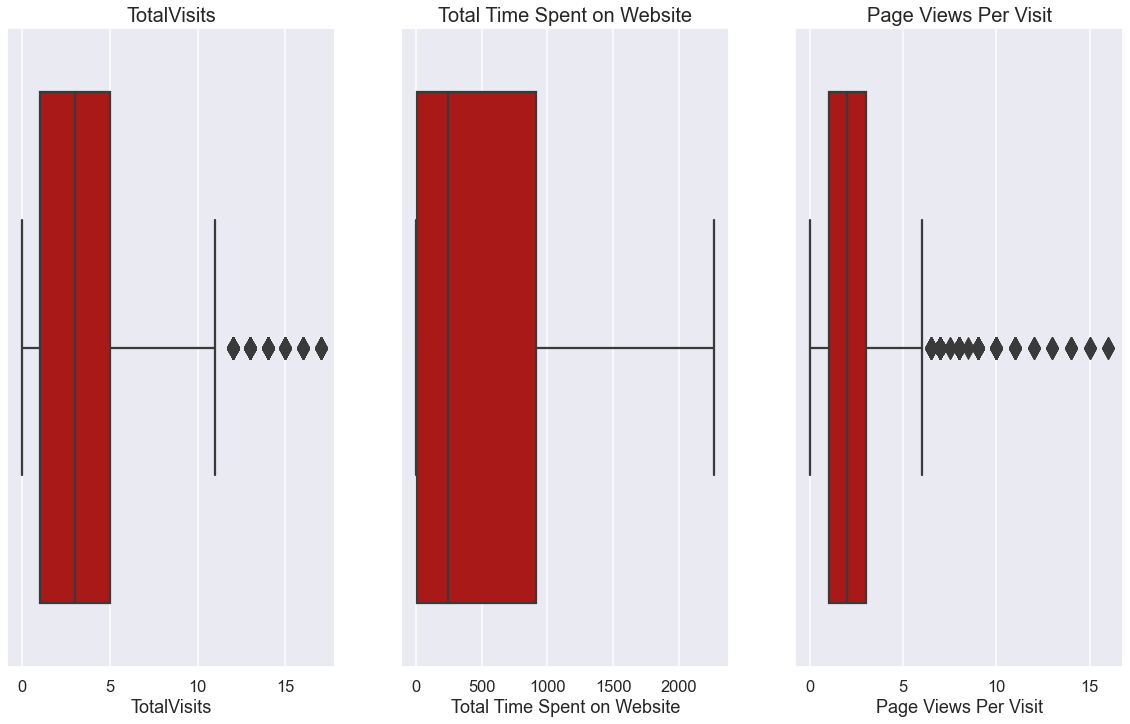

In [403]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(20,40))
plt.tight_layout()
sns.set_style('darkgrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=x_org[col[i]],data=x_org,palette='gist_heat',orient='v',fliersize=15)  # using boxplot

#### Removing Outliers one by one: 
1. Total Visits 
2. Pages Views Per Visit

In [404]:
# Converting some categories to numercial as they are imported as an 'Object'

x_org[['TotalVisits','Page Views Per Visit']]=x_org[['TotalVisits','Page Views Per Visit']].convert_dtypes()

x_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9020 non-null   int64  
 1   Lead Origin                                    9020 non-null   object 
 2   Lead Source                                    9020 non-null   object 
 3   Do Not Email                                   9020 non-null   object 
 4   Do Not Call                                    9020 non-null   object 
 5   Converted                                      9020 non-null   int64  
 6   TotalVisits                                    9020 non-null   Int32  
 7   Total Time Spent on Website                    9020 non-null   int64  
 8   Page Views Per Visit                           9020 non-null   Float64
 9   Country                                        9020 

In [405]:
# Creating bins from 0 to 251 for'TotalVisits' variable
range_TV={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assign '0' or '1' to each

for i in range(len(list(range_TV.keys()))):
    x_org[list(range_TV.keys())[i]]=x_org['TotalVisits'].map(lambda x: 1 if (x < list(range_TV.values())[i] and x >= (list(range_TV.values())[i] - 50)) else 0)

In [406]:
# # Creating bins from 0 to 55 for 'Page Views Per Visit' variable

ranges_PV={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_PV.keys()))):
    x_org[list(ranges_PV.keys())[i]]=x_org['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_PV.values())[i] and x >= (list(ranges_PV.values())[i] - 10)) else 0)

In [407]:
#Drop the Redundant Varibabels from the Dataset

df_redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

x_org=x_org.drop(df_redundant,axis=1)

x_org.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,660737,API,Olark Chat,No,No,0,0,India,Null_specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,1,0,0,0
1,660728,API,Organic Search,No,No,0,674,India,Null_specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,1,0,0,0
2,660727,Landing Page Submission,Direct Traffic,No,No,1,1532,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,1,0,0,0,1,0,0,0
3,660719,Landing Page Submission,Direct Traffic,No,No,0,305,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,1,0,0,0
4,660681,Landing Page Submission,Google,No,No,1,1428,India,Null_specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,1,0,0,0


In [408]:
x_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Number                                    9020 non-null   int64 
 1   Lead Origin                                    9020 non-null   object
 2   Lead Source                                    9020 non-null   object
 3   Do Not Email                                   9020 non-null   object
 4   Do Not Call                                    9020 non-null   object
 5   Converted                                      9020 non-null   int64 
 6   Total Time Spent on Website                    9020 non-null   int64 
 7   Country                                        9020 non-null   object
 8   Specialization                                 9020 non-null   object
 9   What is your current occupation                9020 non-null   

#### Inference: We have few outliers in our dataset, - TotalVisits' and 'Page Views Per Visit

### 3.1.4 Conversion Analysis Based on Different Columns

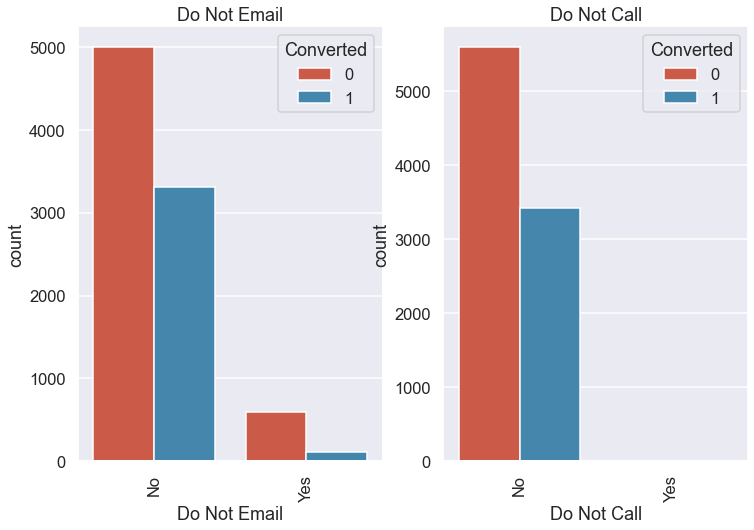

In [409]:
#Correlating Email to conversion
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

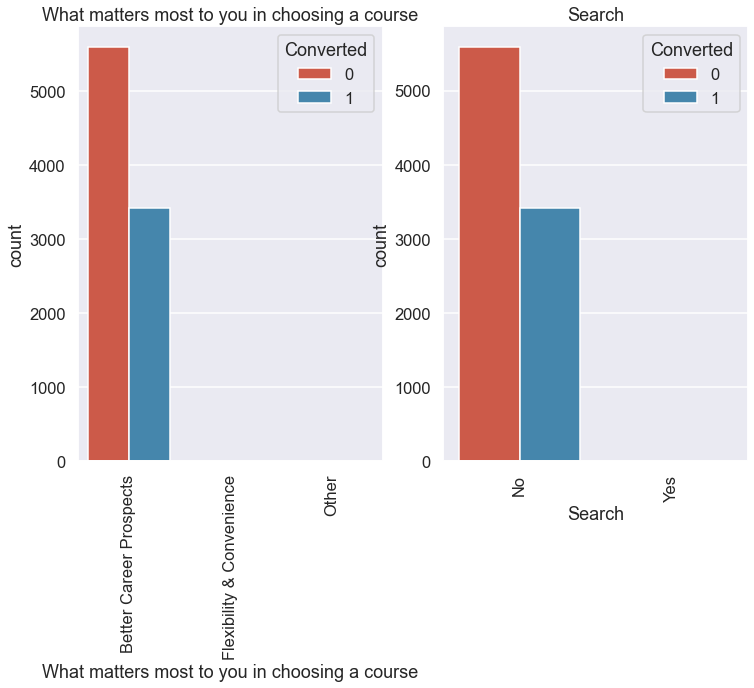

In [410]:
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

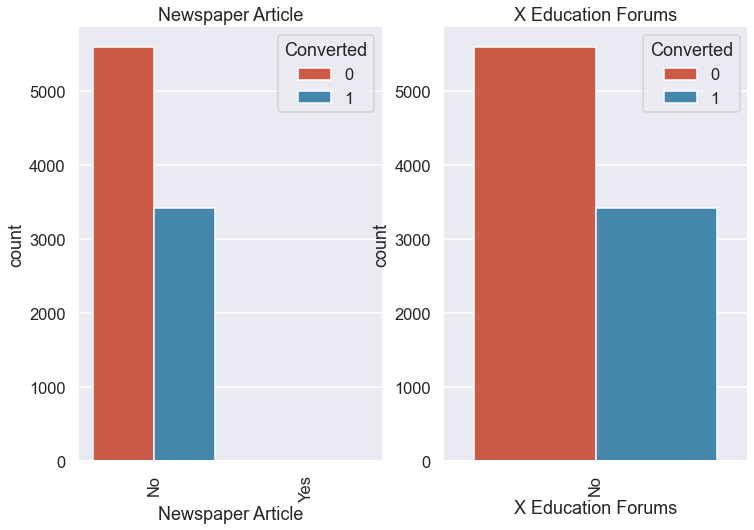

In [411]:
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

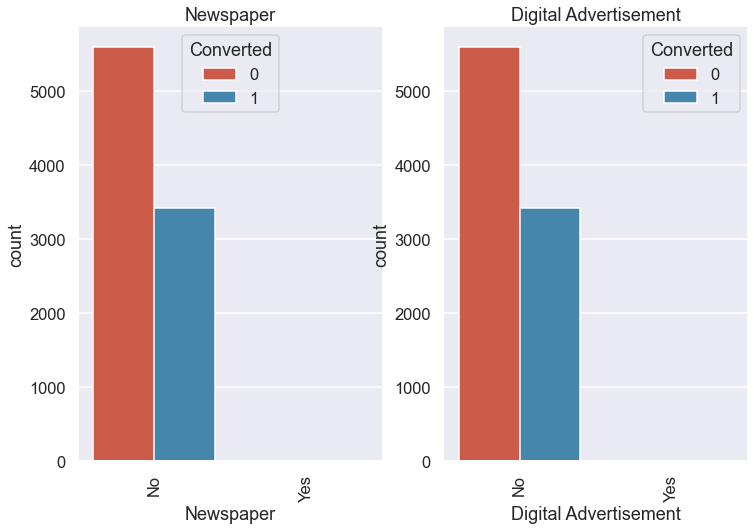

In [412]:
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

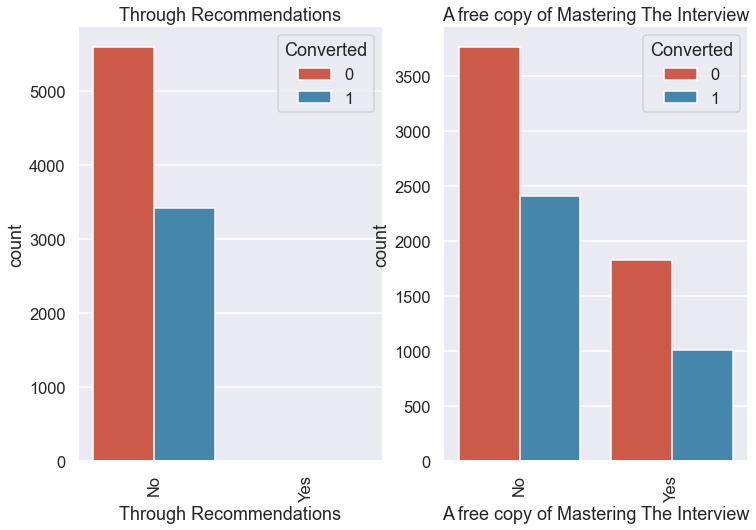

In [413]:
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= x_org).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

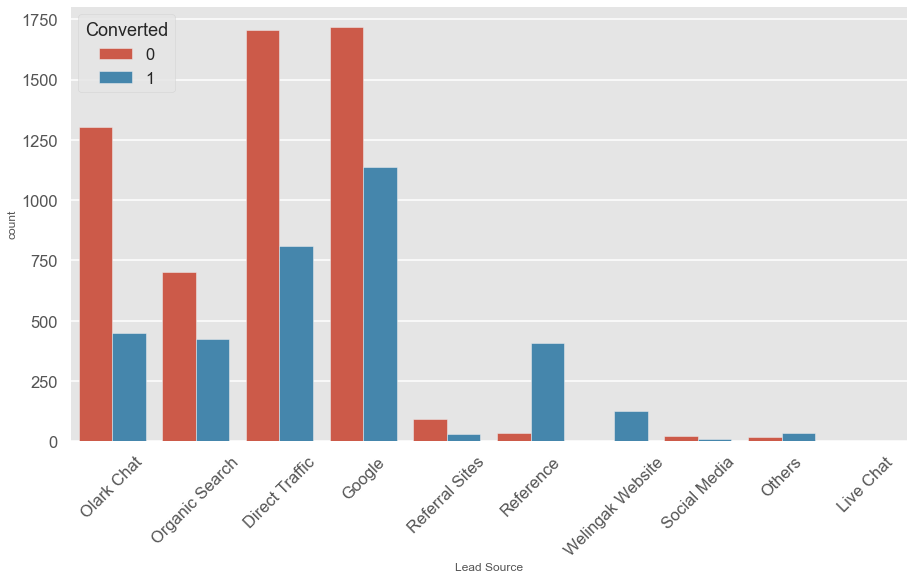

In [414]:
#Draw a count plot for all types for lead sources
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
s1=sns.countplot(x_org['Lead Source'], hue=x_org.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

### Inference:

1. Max leads are from Direct Traffic and Google, makes sense as we live in the age of internet
2. Followed by Olark Chat and Organic Search
3. Welingak Webite has most converted leads.
4. Other sources have to be worked upon for leads conversion

Apart from above,  We can't draw much of the observations from above columns, seems less significant when it comes to converting a lead

### Step4: Data Prepration

#### 4.1.0 Creation of Dummy Variables

#### <font color=brown>Let us assing all the  numerical variables to categories with 'Yes': 1 and 'No' : 0 <font color=brown>

In [415]:
# Dictionary Creation based on two categories {Yes : 1 , No : 0}
category={"No":0,"Yes":1}   

# Column 'Newspaper Article'
x_org['Newspaper Article']=x_org['Newspaper Article'].map(category)

# Column 'X Education Forums'
x_org['X Education Forums']=x_org['X Education Forums'].map(category)

# Column 'Newspaper'
x_org['Newspaper']=x_org['Newspaper'].map(category)

# Column 'Do Not Email'
x_org['Do Not Email']=x_org['Do Not Email'].map(category)

# Column 'Do Not Call'
x_org['Do Not Call']=x_org['Do Not Call'].map(category)

# Column 'Search'
x_org['Search']=x_org['Search'].map(category)

# Column 'Magazine'
x_org['Magazine']=x_org['Magazine'].map(category)

# Column 'Digital Advertisement'
x_org['Digital Advertisement']=x_org['Digital Advertisement'].map(category)

# Column 'Through Recommendations'
x_org['Through Recommendations']=x_org['Through Recommendations'].map(category)

# Column 'Receive More Updates About Our Courses'
x_org['Receive More Updates About Our Courses']=x_org['Receive More Updates About Our Courses'].map(category)

# Column 'Update me on Supply Chain Content'
x_org['Update me on Supply Chain Content']=x_org['Update me on Supply Chain Content'].map(category)

# Column 'Get updates on DM Content'
x_org['Get updates on DM Content']=x_org['Get updates on DM Content'].map(category)

In [416]:
# Creating dummy variables for multiple categories and dropping the first.

x_dummy=pd.get_dummies(x_org[['Lead Origin','Lead Source','What is your current occupation',
                             'What matters most to you in choosing a course']],drop_first=True)

# Merge newly created dummy variblaes to the orginal source.

x_org=pd.concat([x_org,x_dummy],axis=1)

x_org.shape

(9020, 50)

In [417]:
x_org.loc[:, x_org.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [418]:
#Creating dummied for Object dtype variables:
x_dummy2 = pd.get_dummies(x_org[['Country', 'Specialization', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview']], drop_first=True)

# Add the results to the master dataframe
x_org = pd.concat([x_org, x_dummy2], axis=1)
x_org.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Null_specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes
0,660737,API,Olark Chat,0,0,0,0,India,Null_specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,No,No,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,0,0,674,India,Null_specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,No,No,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,1532,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,No,Yes,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,305,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,No,No,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,1428,India,Null_specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,No,No,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [419]:
# We have created dummies for below categories hence removing the original column

x_redundant=['Lead Origin','Lead Source','What is your current occupation',
            'What matters most to you in choosing a course','Country', 'Specialization', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview']


x_org=x_org.drop(x_redundant,1)

x_org.shape

(9020, 90)

In [420]:
# Drop redundant variables

x_redundant1=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

x_org=x_org.drop(x_redundant1,1)

### We now possess dummy variables for our categories

In [421]:
x_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Lead Number                                                              9020 non-null   int64
 1   Do Not Email                                                             9020 non-null   int64
 2   Do Not Call                                                              9020 non-null   int64
 3   Converted                                                                9020 non-null   int64
 4   Total Time Spent on Website                                              9020 non-null   int64
 5   Search                                                                   9020 non-null   int64
 6   Newspaper Article                                                        9020 non-null  

#### 4.1.1 Splitting Training and Test dataset

In [422]:
# Segregate target varaible into a new series 'y'

y=x_org['Converted'] 
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [423]:
# Creation of new dataset 'X' and adding the dependent variable

X=x_org.drop('Converted',1)

In [424]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 85 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Lead Number                                                              9020 non-null   int64
 1   Do Not Email                                                             9020 non-null   int64
 2   Do Not Call                                                              9020 non-null   int64
 3   Total Time Spent on Website                                              9020 non-null   int64
 4   Search                                                                   9020 non-null   int64
 5   Newspaper Article                                                        9020 non-null   int64
 6   X Education Forums                                                       9020 non-null  

In [425]:
#Test- Train Split
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [426]:
#Standard scaling and fitting - tranforming the X - train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Null_specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,A free copy of Mastering The Interview_Yes
2873,632155,0,0,0.0316,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6823,597388,0,0,2.3892,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7258,593827,0,0,-0.8740,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8327,586308,0,0,1.9822,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5940,604266,1,0,-0.7017,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [427]:
# Verify the conversion rate the target variable

(sum(y)/len(y.index))*100

37.971175166297115

### Checkpoint: We already have a conversion rate of approx ~38%

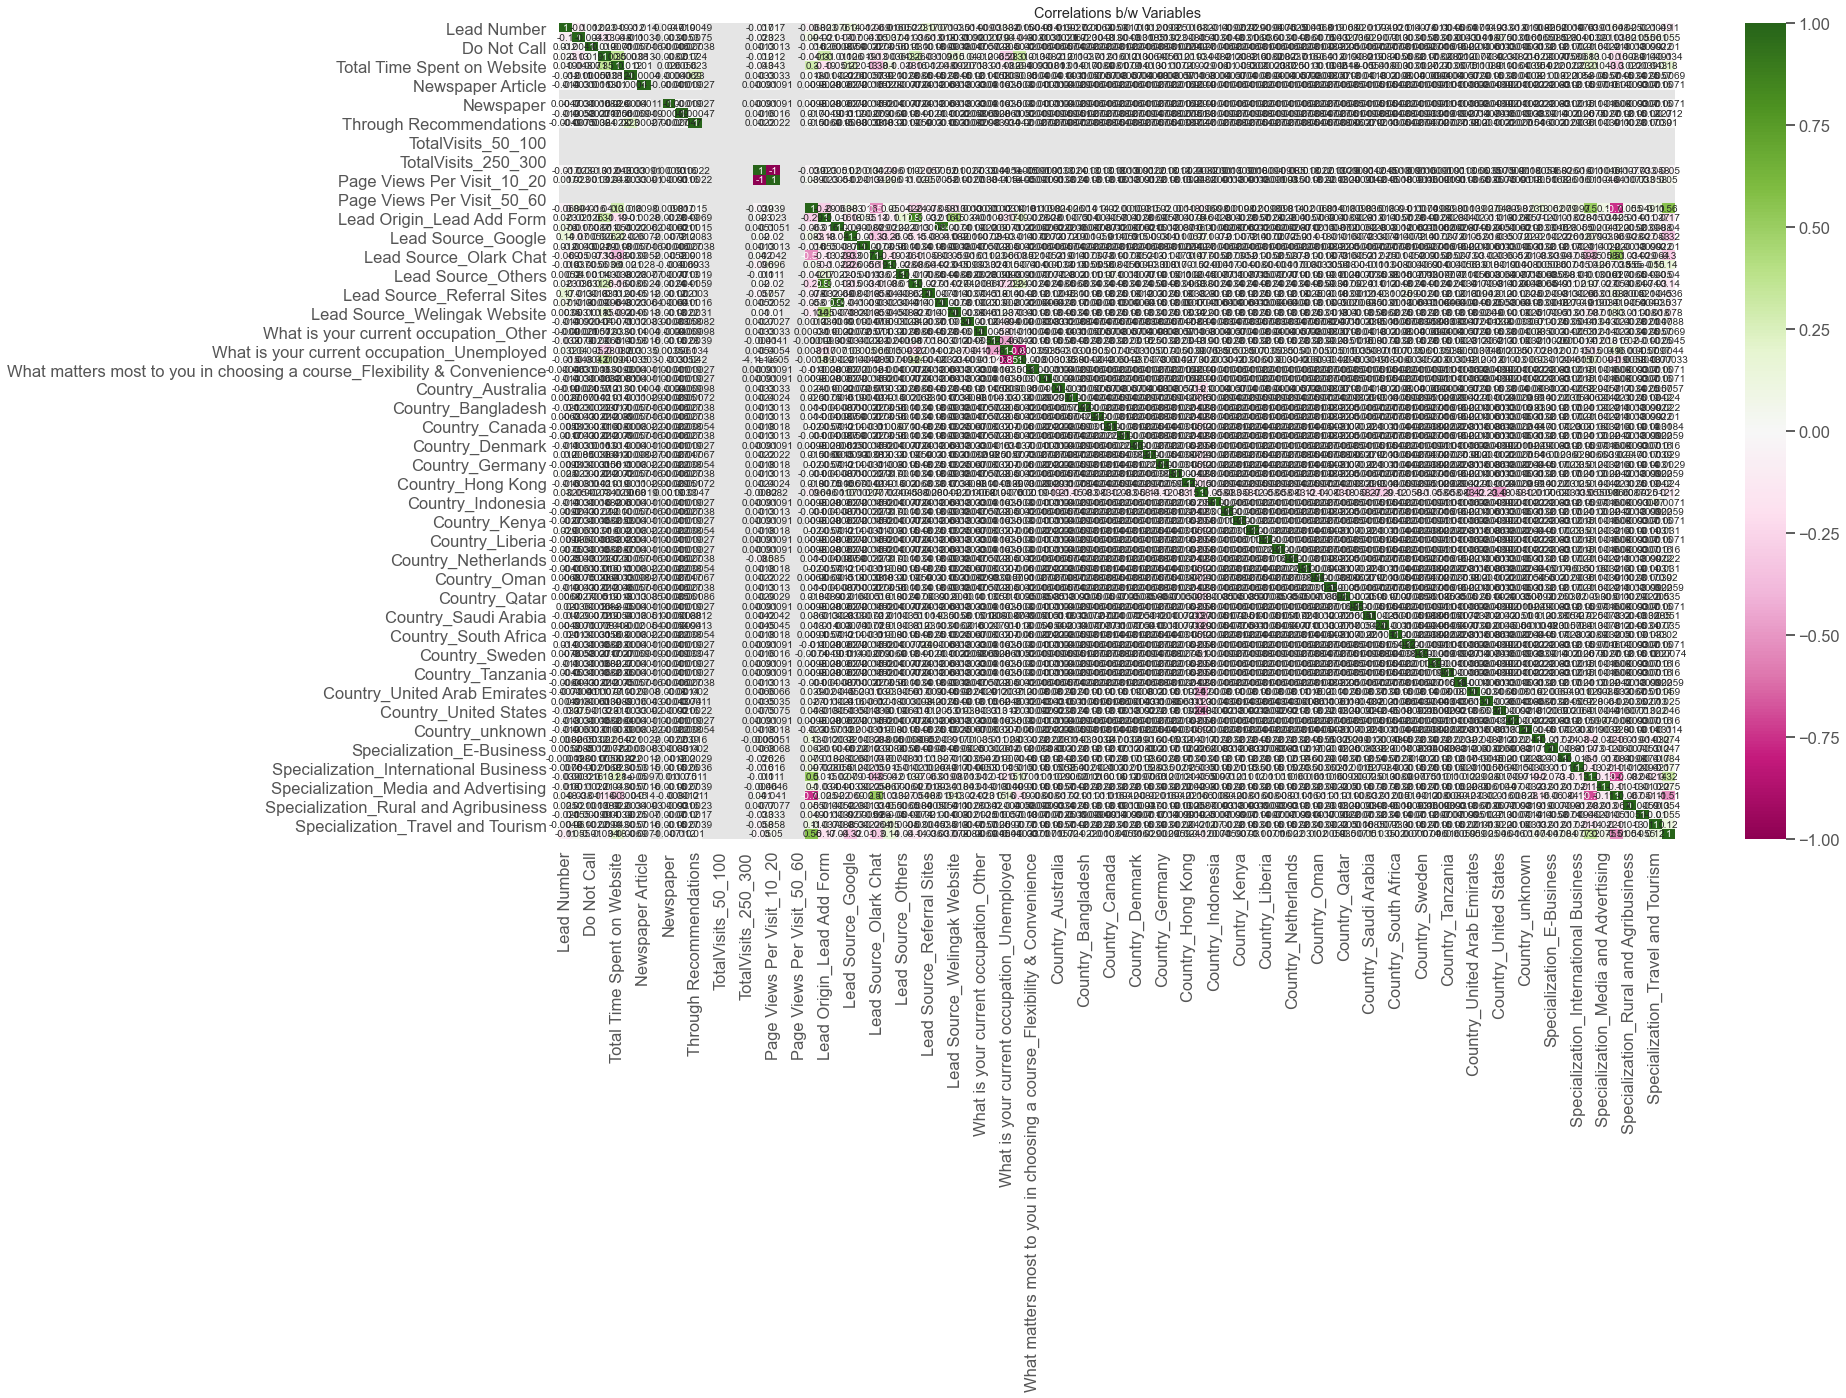

In [428]:
# Heatmap - Correlation between the variables.

plt.figure(figsize=(25,15))
plt.title('Correlations b/w Variables')
corr = x_org.corr()

# Plotting a heatmap
sns.heatmap(corr,annot=True, cmap='PiYG')
plt.show()

In [429]:
# dropping dummy variable from X train set
corr1=['What is your current occupation_Unemployed']

X_train=X_train.drop(corr1,1)     

X_test=X_test.drop(corr1,1) 

### 4.1.2 Model Building

In [430]:
m_logis=sm.GLM(y_train,(sm.add_constant(X_train)),famil=sm.families.Binomial())
m_logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6242
Model Family:                Gaussian   Df Model:                           71
Link Function:               identity   Scale:                         0.15311
Method:                          IRLS   Log-Likelihood:                -2998.5
Date:                Wed, 12 Jan 2022   Deviance:                       955.69
Time:                        21:16:07   Pearson chi2:                     956.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Lead Number                                                              2.352e-08   2.22e-07      0.106      0.916   -4.12e-07    4.59e-07
Do Not Email                                                               -0.1497      0.019     -7.890      0.000      -0.187      -0.113
Do Not Call                                                                 0.1834      0.277      0.661      0.508      -0.360       0.727
Total Time Spent on Website                                                 0.2095      0.006     36.976      0.000       0.198       0.221
Search                                                                      0.0529      0.126      0.421      0.674      -0.194       0.299
Newspaper Article                                                           0.6380      0.392      1.627      0.104      -0.131       1.406
X Education Forums                                                       3.649e-12   3.42e-12      1.068      0.286   -3.05e-12    1.03e-11
Newspaper                                                                  -0.7925      0.392     -2.023      0.043      -1.561      -0.025
Digital Advertisement                                                       0.1303      0.277      0.470      0.638      -0.413       0.674
Through Recommendations                                                     0.1644      0.199      0.828      0.408      -0.225       0.553
TotalVisits_0_50                                                            0.3558      0.207      1.721      0.085      -0.049       0.761
TotalVisits_50_100                                                      -7.029e-12   9.37e-12     -0.750      0.453   -2.54e-11    1.13e-11
TotalVisits_100_150                                                     -7.598e-12   8.01e-12     -0.948      0.343   -2.33e-11     8.1e-12
TotalVisits_250_300                                                     -3.832e-12   3.48e-12     -1.101      0.271   -1.07e-11    2.99e-12
Page Views Per Visit_0_10                                                   0.1675      0.105      1.603      0.109      -0.037       0.372
Page Views Per Visit_10_20                                                  0.1882      0.110      1.715      0.086      -0.027       0.403
Page Views Per Visit_20_30                                               9.131e-12   1.56e-11      0.586      0.558   -2.14e-11    3.97e-11
Page Views Per Visit_50_60                                              -2.854e-12   4.03e-12     -0.708      0.479   -1.08e-11    5.05e-12
Lead Origin_Landing Page Submission                                        -0.1063      0.020     -5.448      0.000      -0.145      -0.068
Lea

### We will now use RFE for feature selection, as there are too many variables for not efficient enough to be checked manually

#### 4.1.3 RFE Method

In [431]:
logreg=LogisticRegression()

### We will create RFE with two different variables count to figure out the best one
1. #### <font color=brown> RFE X_org Test - 1

In [432]:
# RFE for 20 variables

rfe1 = RFE(logreg,20)

rfe1 = rfe1.fit(X_train,y_train) 

In [433]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe1.support_]

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'TotalVisits_0_50', 'Page Views Per Visit_0_10',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional', 'Country_India',
       'Specialization_Management_Specializations',
       'Specialization_Null_specified',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

In [434]:
# selecting columns  rfe.support_ for model creation

x_col=X_train.columns[rfe1.support_]

X_train_1=sm.add_constant(X_train[x_col]) 

X_train_1.head()

,Lead Number,Do Not Email,Total Time Spent on Website,TotalVisits_0_50,Page Views Per Visit_0_10,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Student,What is your current occupation_Working Professional,Country_India,Specialization_Management_Specializations,Specialization_Null_specified,A free copy of Mastering The Interview_Yes
2873,632155,0,0.0316,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0
6823,597388,0,2.3892,1,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1
7258,593827,0,-0.8740,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
8327,586308,0,1.9822,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1
5940,604266,1,-0.7017,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1


#### 4.1.4 Model-1

In [435]:
# creating 1st model after RFE

m_logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=m_logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.0
Date:                Wed, 12 Jan 2022   Deviance:                       5828.1
Time:                        21:16:08   Pearson chi2:                 6.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Lead Number                                          -4.261e-08   1.45e-06     -0.029      0.977   -2.89e-06     2.8e-06
Do Not Email                                            -1.2993      0.164     -7.939      0.000      -1.620      -0.978
Total Time Spent on Website                              1.1017      0.038     28.919      0.000       1.027       1.176
TotalVisits_0_50                                        -0.2913      0.999     -0.292      0.771      -2.249       1.666
Page Views Per Visit_0_10                               -0.0712      0.361     -0.197      0.844      -0.779       0.637
Lead Origin_Landing Page Submission                     -0.7644      0.126     -6.064      0.000      -1.011      -0.517
Lead Origin_Lead Add Form                                3.9154      0.839      4.669      0.000       2.272       5.559
Lead Source_Google                                       0.2341      0.108      2.171      0.030       0.023       0.446
Lead Source_Olark Chat                                   1.0492      0.144      7.291      0.000       0.767       1.331
Lead Source_Organic Search                               0.3058      0.115      2.662      0.008       0.081       0.531
Lead Source_Others                                       0.6939      0.588      1.179      0.238      -0.460       1.847
Lead Source_Reference                                    0.1466      0.871      0.168      0.866      -1.560       1.853
Lead Source_Referral Sites                              -0.1304      0.346     -0.376      0.707      -0.809       0.548
Lead Source_Welingak Website                             2.4571      1.103      2.227      0.026       0.295       4.620
What is your current occupation_Student                  0.0684      0.218      0.314      0.754      -0.359       0.496
What is your current occupation_Working Professional     2.5470      0.185     13.794      0.000       2.185       2.909
Country_India                                            0.1210      0.202      0.599      0.549      -0.275       0.517
Specialization_Management_Specializations               -0.1237      0.091     -1.357      0.175      -0.302       0.055
Specialization_Null_specified                           -1.2495      0.137     -9.123      0.000      -1.518      -0.981
A free copy of Mastering The Interview_Yes              -0.1422      0.102     -1.393      0.164      -0.342       0.058
========================================================================================================================
"""

In [436]:
# VIF

vif1=pd.DataFrame()

vif1['Features']=X_train_1[x_col].columns  

# Caculating VIFs

vif1['VIF']=[variance_inflation_factor(X_train_1[x_col].values,i) for i in range(X_train_1[x_col].shape[1])]

vif1['VIF']=round(vif1['VIF'],2)

# Sorting VIF Values
vif1=vif1.sort_values(by='VIF',ascending=False)
vif1

,Features,VIF
3,TotalVisits_0_50,955.9100
6,Lead Origin_Lead Add Form,31.7000
11,Lead Source_Reference,24.4200
13,Lead Source_Welingak Website,8.5100
18,Specialization_Null_specified,4.1400
5,Lead Origin_Landing Page Submission,3.7800
8,Lead Source_Olark Chat,2.9500
7,Lead Source_Google,2.4400
19,A free copy of Mastering The Interview_Yes,2.1600
17,Specialization_Management_Specializations,2.0300


#### As you can observe, there are very high values of VIF and high p-values. We have to go with different model and drop columns as well

In [437]:
X_train_2=X_train_1.drop(['TotalVisits_0_50'],1)

In [438]:
# Recreating a new model

X_train_2=sm.add_constant(X_train_2)                                
m_logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())    
reg2=m_logis2.fit()                                                   
reg2.summary()               

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6294
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                         0.15314
Method:                          IRLS   Log-Likelihood:                -3025.3
Date:                Wed, 12 Jan 2022   Deviance:                       963.85
Time:                        21:16:08   Pearson chi2:                     964.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3878      0.152      2.547      0.011       0.089       0.686
Lead Number                                           5.205e-08    2.2e-07      0.236      0.813    -3.8e-07    4.84e-07
Do Not Email                                            -0.1514      0.019     -8.052      0.000      -0.188      -0.115
Total Time Spent on Website                              0.2085      0.006     37.036      0.000       0.197       0.220
Page Views Per Visit_0_10                               -0.0193      0.056     -0.343      0.732      -0.130       0.091
Lead Origin_Landing Page Submission                     -0.1104      0.019     -5.750      0.000      -0.148      -0.073
Lead Origin_Lead Add Form                                0.6374      0.110      5.791      0.000       0.422       0.853
Lead Source_Google                                       0.0381      0.017      2.306      0.021       0.006       0.070
Lead Source_Olark Chat                                   0.1667      0.021      7.784      0.000       0.125       0.209
Lead Source_Organic Search                               0.0474      0.018      2.677      0.007       0.013       0.082
Lead Source_Others                                       0.1123      0.092      1.217      0.224      -0.069       0.293
Lead Source_Reference                                   -0.0222      0.113     -0.196      0.844      -0.243       0.199
Lead Source_Referral Sites                              -0.0243      0.049     -0.501      0.616      -0.119       0.071
Lead Source_Welingak Website                             0.2701      0.117      2.300      0.021       0.040       0.500
What is your current occupation_Student                  0.0197      0.033      0.590      0.555      -0.046       0.085
What is your current occupation_Working Professional     0.3472      0.020     17.004      0.000       0.307       0.387
Country_India                                            0.0104      0.029      0.355      0.722      -0.047       0.068
Specialization_Management_Specializations               -0.0186      0.014     -1.320      0.187      -0.046       0.009
Specialization_Null_specified                           -0.1895      0.021     -9.123      0.000      -0.230      -0.149
A free copy of Mastering The Interview_Yes              -0.0263      0.016     -1.682      0.092      -0.057       0.004
========================================================================================================================
"""

In [439]:
# VIF

vif2=pd.DataFrame()

vif2['Features']=X_train_2.columns  

# Caculating VIFs

vif2['VIF']=[variance_inflation_factor(X_train_2.values,i) for i in range(X_train_2.shape[1])]

vif2['VIF']=round(vif2['VIF'],2)

# Sorting VIF Values
vif2=vif2.sort_values(by='VIF',ascending=False)
vif2

,Features,VIF
0,const,955.9100
6,Lead Origin_Lead Add Form,31.7000
11,Lead Source_Reference,24.4200
13,Lead Source_Welingak Website,8.5100
18,Specialization_Null_specified,4.1400
5,Lead Origin_Landing Page Submission,3.7800
8,Lead Source_Olark Chat,2.9500
7,Lead Source_Google,2.4400
19,A free copy of Mastering The Interview_Yes,2.1600
17,Specialization_Management_Specializations,2.0300


In [440]:
X_train_3=X_train_2.drop(['const','Lead Origin_Lead Add Form'],1)

In [441]:
# Recreating a new model

X_train_3=sm.add_constant(X_train_3)                                
m_logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    
reg3=m_logis3.fit()                                                   
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6295
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.15393
Method:                          IRLS   Log-Likelihood:                -3042.1
Date:                Wed, 12 Jan 2022   Deviance:                       968.98
Time:                        21:16:08   Pearson chi2:                     969.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3848      0.153      2.521      0.012       0.086       0.684
Lead Number                                           5.438e-08   2.21e-07      0.246      0.805   -3.78e-07    4.87e-07
Do Not Email                                            -0.1504      0.019     -7.975      0.000      -0.187      -0.113
Total Time Spent on Website                              0.2076      0.006     36.803      0.000       0.197       0.219
Page Views Per Visit_0_10                               -0.0122      0.056     -0.217      0.828      -0.123       0.098
Lead Origin_Landing Page Submission                     -0.1187      0.019     -6.182      0.000      -0.156      -0.081
Lead Source_Google                                       0.0355      0.017      2.143      0.032       0.003       0.068
Lead Source_Olark Chat                                   0.1610      0.021      7.504      0.000       0.119       0.203
Lead Source_Organic Search                               0.0452      0.018      2.546      0.011       0.010       0.080
Lead Source_Others                                       0.4787      0.067      7.114      0.000       0.347       0.611
Lead Source_Reference                                    0.6061      0.031     19.578      0.000       0.545       0.667
Lead Source_Referral Sites                              -0.0285      0.049     -0.585      0.558      -0.124       0.067
Lead Source_Welingak Website                             0.9008      0.044     20.444      0.000       0.814       0.987
What is your current occupation_Student                  0.0195      0.034      0.581      0.561      -0.046       0.085
What is your current occupation_Working Professional     0.3477      0.020     16.985      0.000       0.308       0.388
Country_India                                            0.0129      0.029      0.441      0.659      -0.044       0.070
Specialization_Management_Specializations               -0.0170      0.014     -1.209      0.227      -0.045       0.011
Specialization_Null_specified                           -0.1919      0.021     -9.220      0.000      -0.233      -0.151
A free copy of Mastering The Interview_Yes              -0.0270      0.016     -1.718      0.086      -0.058       0.004
========================================================================================================================
"""

In [442]:
# VIF

vif3=pd.DataFrame()

vif3['Features']=X_train_3.columns  

# Caculating VIFs

vif3['VIF']=[variance_inflation_factor(X_train_3.values,i) for i in range(X_train_3.shape[1])]

vif3['VIF']=round(vif3['VIF'],2)

# Sorting VIF Values
vif3=vif3.sort_values(by='VIF',ascending=False)
vif3

,Features,VIF
0,const,955.9000
17,Specialization_Null_specified,4.1300
5,Lead Origin_Landing Page Submission,3.7600
7,Lead Source_Olark Chat,2.9500
6,Lead Source_Google,2.4400
18,A free copy of Mastering The Interview_Yes,2.1600
16,Specialization_Management_Specializations,2.0200
10,Lead Source_Reference,1.8300
8,Lead Source_Organic Search,1.4400
3,Total Time Spent on Website,1.3100


In [443]:
X_train_4=X_train_3.drop(['Lead Number','Page Views Per Visit_0_10'],1)

In [444]:
# Recreating a new model

X_train_4=sm.add_constant(X_train_4)                                
m_logis4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())    
reg4=m_logis4.fit()                                                   
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6297
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.15388
Method:                          IRLS   Log-Likelihood:                -3042.1
Date:                Wed, 12 Jan 2022   Deviance:                       969.00
Time:                        21:16:08   Pearson chi2:                     969.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4059      0.038     10.631      0.000       0.331       0.481
Do Not Email                                            -0.1508      0.019     -8.033      0.000      -0.188      -0.114
Total Time Spent on Website                              0.2076      0.006     36.812      0.000       0.197       0.219
Lead Origin_Landing Page Submission                     -0.1188      0.019     -6.192      0.000      -0.156      -0.081
Lead Source_Google                                       0.0360      0.016      2.187      0.029       0.004       0.068
Lead Source_Olark Chat                                   0.1610      0.021      7.510      0.000       0.119       0.203
Lead Source_Organic Search                               0.0457      0.018      2.590      0.010       0.011       0.080
Lead Source_Others                                       0.4793      0.067      7.127      0.000       0.347       0.611
Lead Source_Reference                                    0.6065      0.031     19.602      0.000       0.546       0.667
Lead Source_Referral Sites                              -0.0255      0.048     -0.533      0.594      -0.119       0.068
Lead Source_Welingak Website                             0.9010      0.044     20.452      0.000       0.815       0.987
What is your current occupation_Student                  0.0194      0.034      0.580      0.562      -0.046       0.085
What is your current occupation_Working Professional     0.3475      0.020     16.992      0.000       0.307       0.388
Country_India                                            0.0132      0.029      0.451      0.652      -0.044       0.070
Specialization_Management_Specializations               -0.0171      0.014     -1.215      0.224      -0.045       0.010
Specialization_Null_specified                           -0.1921      0.021     -9.233      0.000      -0.233      -0.151
A free copy of Mastering The Interview_Yes              -0.0269      0.016     -1.716      0.086      -0.058       0.004
========================================================================================================================
"""

In [445]:
X_train_5=X_train_4.drop(['Country_India','Lead Source_Referral Sites','What is your current occupation_Student','A free copy of Mastering The Interview_Yes'],1)


In [446]:
# Recreating a new model

X_train_5=sm.add_constant(X_train_5)                                
m_logis5=sm.GLM(y_train,X_train_5,families=sm.families.Binomial())    
reg5=m_logis5.fit()                                                   
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6301
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.15387
Method:                          IRLS   Log-Likelihood:                -3044.0
Date:                Wed, 12 Jan 2022   Deviance:                       969.57
Time:                        21:16:08   Pearson chi2:                     970.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3999      0.024     16.998      0.000       0.354       0.446
Do Not Email                                            -0.1496      0.019     -7.985      0.000      -0.186      -0.113
Total Time Spent on Website                              0.2075      0.006     36.801      0.000       0.196       0.218
Lead Origin_Landing Page Submission                     -0.1219      0.019     -6.462      0.000      -0.159      -0.085
Lead Source_Google                                       0.0527      0.014      3.898      0.000       0.026       0.079
Lead Source_Olark Chat                                   0.1742      0.020      8.773      0.000       0.135       0.213
Lead Source_Organic Search                               0.0512      0.017      2.975      0.003       0.017       0.085
Lead Source_Others                                       0.4929      0.067      7.384      0.000       0.362       0.624
Lead Source_Reference                                    0.6231      0.029     21.148      0.000       0.565       0.681
Lead Source_Welingak Website                             0.9142      0.043     21.133      0.000       0.829       0.999
What is your current occupation_Working Professional     0.3483      0.020     17.061      0.000       0.308       0.388
Specialization_Management_Specializations               -0.0169      0.014     -1.201      0.230      -0.045       0.011
Specialization_Null_specified                           -0.1857      0.020     -9.105      0.000      -0.226      -0.146
========================================================================================================================
"""

In [447]:
# VIF

vif5=pd.DataFrame()

vif5['Features']=X_train_5.columns  

# Caculating VIFs

vif5['VIF']=[variance_inflation_factor(X_train_5.values,i) for i in range(X_train_5.shape[1])]

vif5['VIF']=round(vif5['VIF'],2)

# Sorting VIF Values
vif5=vif5.sort_values(by='VIF',ascending=False)
vif5

,Features,VIF
0,const,22.7100
12,Specialization_Null_specified,3.9700
3,Lead Origin_Landing Page Submission,3.6400
5,Lead Source_Olark Chat,2.5300
11,Specialization_Management_Specializations,2.0200
8,Lead Source_Reference,1.6600
4,Lead Source_Google,1.6300
6,Lead Source_Organic Search,1.3500
2,Total Time Spent on Website,1.3000
9,Lead Source_Welingak Website,1.1500


In [448]:
X_train_6=X_train_5.drop(['Specialization_Management_Specializations','Lead Source_Organic Search','Lead Source_Google'],1)

In [449]:
# Recreating a new model

X_train_6=sm.add_constant(X_train_6)                                
m_logis6=sm.GLM(y_train,X_train_6,families=sm.families.Binomial())    
reg6=m_logis6.fit()                                                   
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6304
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.15426
Method:                          IRLS   Log-Likelihood:                -3053.3
Date:                Wed, 12 Jan 2022   Deviance:                       972.44
Time:                        21:16:08   Pearson chi2:                     972.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4342      0.018     24.565      0.000       0.400       0.469
Do Not Email                                            -0.1536      0.019     -8.214      0.000      -0.190      -0.117
Total Time Spent on Website                              0.2084      0.006     36.965      0.000       0.197       0.219
Lead Origin_Landing Page Submission                     -0.1422      0.018     -7.810      0.000      -0.178      -0.107
Lead Source_Olark Chat                                   0.1291      0.017      7.767      0.000       0.097       0.162
Lead Source_Others                                       0.4535      0.066      6.855      0.000       0.324       0.583
Lead Source_Reference                                    0.5771      0.027     21.089      0.000       0.523       0.631
Lead Source_Welingak Website                             0.8690      0.042     20.730      0.000       0.787       0.951
What is your current occupation_Working Professional     0.3460      0.020     16.963      0.000       0.306       0.386
Specialization_Null_specified                           -0.1742      0.018     -9.938      0.000      -0.209      -0.140
========================================================================================================================
"""

In [450]:
X_train_6_1=X_train_6.drop(['const'],1)

In [451]:
# VIF

vif6=pd.DataFrame()

vif6['Features']=X_train_6_1.columns  

# Caculating VIFs

vif6['VIF']=[variance_inflation_factor(X_train_6_1.values,i) for i in range(X_train_6_1.shape[1])]

vif6['VIF']=round(vif6['VIF'],2)

# Sorting VIF Values
vif6=vif6.sort_values(by='VIF',ascending=False)
vif6

,Features,VIF
3,Lead Source_Olark Chat,1.8700
8,Specialization_Null_specified,1.8000
1,Total Time Spent on Website,1.2700
2,Lead Origin_Landing Page Submission,1.1700
5,Lead Source_Reference,1.1500
7,What is your current occupation_Working Profes...,1.1500
0,Do Not Email,1.1100
6,Lead Source_Welingak Website,1.0700
4,Lead Source_Others,1.0100


### Checkpoint
#### 1. VIFs are low
#### 2. p-values are below 0.05

#### Hence, this Model 6 can be considered for prediction

### 4.1.5 Model Prediction

In [452]:
# Predict the train dataset on X_train_6 - Model

y_train_pred=reg6.predict(X_train_6)

# Creating a new dataset

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()

,Converted,Converted_probability,ID
2873,1,0.6447,2873
6823,1,0.7899,6823
7258,0,0.2070,7258
8327,1,0.7051,8327
5940,0,-0.0077,5940


### Step 5: Model Evaluation

#### 5.1.0 Plot ROC Curve

In [453]:
# Function to plot roc curve with Area Under Curve score

def x_org_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the area under the curve
    
    auc_score = roc_auc_score( real, probability )    

    plt.figure(figsize=(12, 8))
    
    # Plot the roc curve
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plot 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    plt.ylim([0.0, 1.05])
    
    # Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve',fontdict={'fontsize': 20,'fontweight': 6,'color': 'Black'})      
    plt.legend(loc="lower right")
    plt.show()

    return None 

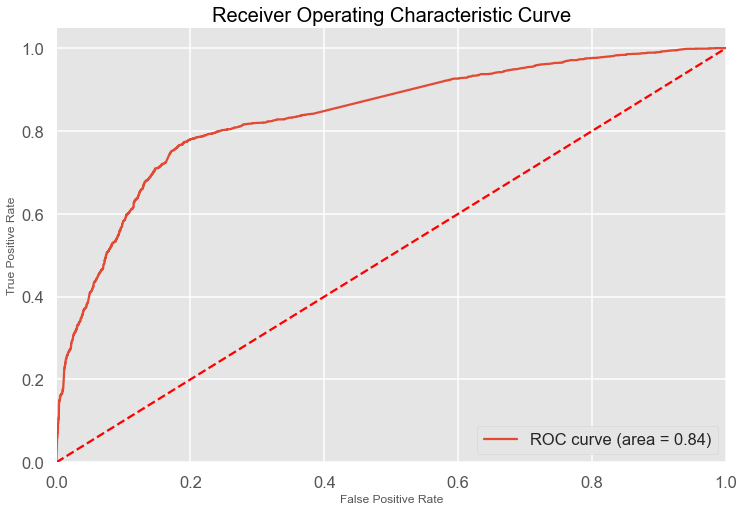

In [454]:
#Call the function

x_org_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

### Evaluation of the correct the ROC Curve:
1.ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.

2.The curve closer to the left side border then right side of the border is more accurate.

3.The curve closer to the 45-degree diagonal of the ROC space is less accurate.

### Evaluating points from above:

1. The created ROC curve is much closer to the left side of the border than to the right side , therefore the model has good accuracy.
2. Area Under Curve(AUC)- 84% of the total area

#### 5.1.1 Optimal Cut Off point

In [455]:
# We will choose one cut off point from the many created

x_num=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in x_num:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0) 
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2873,1,0.6447,2873,1,1,1,1,1,1,1,0,0,0
6823,1,0.7899,6823,1,1,1,1,1,1,1,1,0,0
7258,0,0.2070,7258,1,1,1,0,0,0,0,0,0,0
8327,1,0.7051,8327,1,1,1,1,1,1,1,1,0,0
5940,0,-0.0077,5940,0,0,0,0,0,0,0,0,0,0


#### 5.1.2 We shall calculate 'Sensitivity', 'Accuracy', and 'Specificity' for each of these points to measure the relevance of the data points

In [456]:
# Create a dataset to store all the values,which are to be created

x_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# Range = 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

# creating confusion matrix,take a sum, Store Accuracy,Senstivity,Specificity, Append all into the dataset

for i in var:
    cnf_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  
    total=sum(sum(cnf_matrix))                                                         
    accuracy=(cnf_matrix[0,0]+cnf_matrix[1,1])/total                                     
    sensitivity=cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])                       
    specificity=cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])                        
    x_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                        
print(x_cutoffs)  

        Probability  Accuracy  Sensitvity  Specificity
0.0000       0.0000    0.3955      0.9987       0.0312
0.1000       0.1000    0.4436      0.9891       0.1143
0.2000       0.2000    0.5980      0.9264       0.3998
0.3000       0.3000    0.7852      0.7863       0.7846
0.4000       0.4000    0.7962      0.7143       0.8456
0.5000       0.5000    0.7860      0.6226       0.8847
0.6000       0.6000    0.7620      0.4863       0.9284
0.7000       0.7000    0.7284      0.3307       0.9685
0.8000       0.8000    0.7059      0.2411       0.9865
0.9000       0.9000    0.6779      0.1531       0.9947


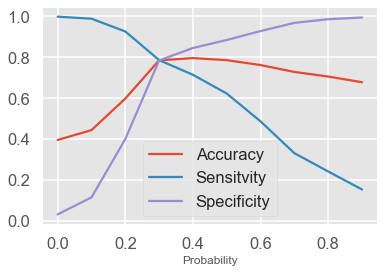

In [457]:
# Plot 'Accuracy' , 'Sensitivity' and 'Specificity' for all probabilities

x_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

#### It is evident that, it is strongly pointing at <font color=brown> 0.30.
     It is now the optimum point for taking probability cutoff

In [458]:
# Predicting the outcomes cutoff as 0.3

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )

y_train_pred_final.head(10)

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
2873,1,0.6447,2873,1,1,1,1,1,1,1,0,0,0,1
6823,1,0.7899,6823,1,1,1,1,1,1,1,1,0,0,1
7258,0,0.2070,7258,1,1,1,0,0,0,0,0,0,0,0
8327,1,0.7051,8327,1,1,1,1,1,1,1,1,0,0,1
5940,0,-0.0077,5940,0,0,0,0,0,0,0,0,0,0,0
5686,1,0.8206,5686,1,1,1,1,1,1,1,1,1,0,1
5372,1,0.7987,5372,1,1,1,1,1,1,1,1,0,0,1
4736,0,0.0889,4736,1,0,0,0,0,0,0,0,0,0,0
5812,1,1.1752,5812,1,1,1,1,1,1,1,1,1,1,1
893,0,0.6487,893,1,1,1,1,1,1,1,0,0,0,1


#### 5.1.3 Precision and Recall

In [459]:
# Create confusion matrix to find precision and recall score

x_confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
x_confusion

array([[3089,  848],
       [ 508, 1869]], dtype=int64)

In [460]:
# Calculate below values for our Final Train model
#True positive
TP=x_confusion[1,1]
#True negative
TN=x_confusion[0,0]
#False Positive
FP=x_confusion[0,1]
#False Negative
FN=x_confusion[1,0]

##### Sensitivity

In [461]:
#Sensitivity for our Train model
TP/float(TP+FN)

0.7862852334875894

##### Specificity

In [462]:
#Specificity for our Train model
TN/float(TN+FP)

0.7846075692151384

##### False positive rate

In [463]:
#Cal False positive rate for our Train model
print(FP/float(TN+FP))

0.21539243078486156


##### Positive predictive value

In [464]:
#Cal Positive predictive value for our Train model
print(TP/float(TP+FP))

0.6878910563121089


##### Negative predictive value

In [465]:
#Cal Negative predictive value for our Train model
print(TN/float(TN+FN))

0.8587711982207396


##### Precision and Recall

In [466]:
# Print Pecision score
print('Precision',x_confusion[1,1]/(x_confusion[0,1]+x_confusion[1,1]))
# Print Recall score
print('Recall',x_confusion[1,1]/(x_confusion[1,0]+x_confusion[1,1]))       

Precision 0.6878910563121089
Recall 0.7862852334875894


#### We shall put our emphasis on "Recall" value even if our precision is a bit on lower side,  but we cant afford to leave out any hot leads can potentially get converted. 
#### Therefore, Recall has more signifance than Precision in this model.

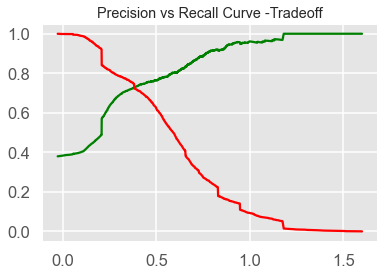

In [467]:
# Precision and Recall trade-off curve

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall Curve -Tradeoff')
#Plot Precision
plt.plot(thresholds, p[:-1], "g-")
#Plot Recall
plt.plot(thresholds, r[:-1], "r-")    
plt.show()

#### Checkpoint: It is validated that "Precision is inversely propotionally to Recall."
#### It lies somewhere close to 0.3-0.4

### Step - 6 As mentioned above, we will create RFE with two different variables count to figure out the best one
2. #### <font color=brown> RFE X_org Test - 2

In [468]:
# RFE for 20 variables

rfe2 = RFE(logreg,15)

rfe2 = rfe2.fit(X_train,y_train)

In [469]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe2.support_]

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'TotalVisits_0_50', 'Page Views Per Visit_0_10',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Country_India',
       'Specialization_Management_Specializations',
       'Specialization_Null_specified',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

In [470]:
# selecting columns  rfe.support_ for model creation

x_col2=X_train.columns[rfe2.support_]

X_train_rfe2=sm.add_constant(X_train[x_col2]) 

X_train_rfe2.head()

,Lead Number,Do Not Email,Total Time Spent on Website,TotalVisits_0_50,Page Views Per Visit_0_10,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Working Professional,Country_India,Specialization_Management_Specializations,Specialization_Null_specified,A free copy of Mastering The Interview_Yes
2873,632155,0,0.0316,1,1,1,0,0,0,0,1,1,1,0,0
6823,597388,0,2.3892,1,1,1,0,0,0,0,0,1,1,0,1
7258,593827,0,-0.8740,1,1,0,0,1,0,0,0,1,0,1,0
8327,586308,0,1.9822,1,1,1,0,0,0,0,0,1,1,0,1
5940,604266,1,-0.7017,1,1,1,0,0,0,0,0,1,1,0,1


#### RFE2- Model1

In [471]:
# creating 1st model after RFE

m_logis_rfe2=sm.GLM(y_train,X_train_rfe2,family=sm.families.Binomial())

reg_rfe2=m_logis_rfe2.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.1
Date:                Wed, 12 Jan 2022   Deviance:                       5838.1
Time:                        21:16:10   Pearson chi2:                 6.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Lead Number                                            2.15e-08   1.43e-06      0.015      0.988   -2.78e-06    2.82e-06
Do Not Email                                            -1.3048      0.163     -8.014      0.000      -1.624      -0.986
Total Time Spent on Website                              1.1035      0.038     29.005      0.000       1.029       1.178
TotalVisits_0_50                                        -0.0224      0.990     -0.023      0.982      -1.963       1.918
Page Views Per Visit_0_10                               -0.1569      0.354     -0.443      0.658      -0.851       0.537
Lead Origin_Landing Page Submission                     -0.8215      0.123     -6.656      0.000      -1.063      -0.580
Lead Origin_Lead Add Form                                4.3364      0.662      6.551      0.000       3.039       5.634
Lead Source_Olark Chat                                   0.8281      0.112      7.396      0.000       0.609       1.048
Lead Source_Reference                                   -0.5032      0.696     -0.723      0.469      -1.867       0.860
Lead Source_Welingak Website                             1.8146      0.971      1.869      0.062      -0.088       3.717
What is your current occupation_Working Professional     2.5428      0.184     13.805      0.000       2.182       2.904
Country_India                                            0.1578      0.201      0.786      0.432      -0.235       0.551
Specialization_Management_Specializations               -0.1376      0.091     -1.517      0.129      -0.315       0.040
Specialization_Null_specified                           -1.2849      0.136     -9.456      0.000      -1.551      -1.019
A free copy of Mastering The Interview_Yes              -0.2440      0.085     -2.886      0.004      -0.410      -0.078
========================================================================================================================
"""

In [472]:
# VIF

vif1_rfe2=pd.DataFrame()

vif1_rfe2['Features']=X_train_rfe2[x_col2].columns  

# Caculating VIFs

vif1_rfe2['VIF']=[variance_inflation_factor(X_train_rfe2[x_col2].values,i) for i in range(X_train_rfe2[x_col2].shape[1])]

vif1_rfe2['VIF']=round(vif1_rfe2['VIF'],2)

# Sorting VIF Values
vif1_rfe2=vif1_rfe2.sort_values(by='VIF',ascending=False)
vif1_rfe2

,Features,VIF
3,TotalVisits_0_50,941.0000
6,Lead Origin_Lead Add Form,16.4100
8,Lead Source_Reference,12.8400
9,Lead Source_Welingak Website,4.7900
13,Specialization_Null_specified,4.0900
5,Lead Origin_Landing Page Submission,3.6200
12,Specialization_Management_Specializations,2.0100
7,Lead Source_Olark Chat,1.8000
14,A free copy of Mastering The Interview_Yes,1.5300
2,Total Time Spent on Website,1.3000


#### Let us drop, high p-values and VIF's

In [473]:
X_train_rfe2=X_train_rfe2.drop(['TotalVisits_0_50'],1)

In [474]:
# Recreating a new model
X_train_rfe2=sm.add_constant(X_train_rfe2) 
m_logis_rfe2=sm.GLM(y_train,X_train_rfe2,family=sm.families.Binomial())

reg_rfe2=m_logis_rfe2.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.1
Date:                Wed, 12 Jan 2022   Deviance:                       5838.1
Time:                        21:16:11   Pearson chi2:                 6.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0224      0.990     -0.023      0.982      -1.963       1.918
Lead Number                                            2.15e-08   1.43e-06      0.015      0.988   -2.78e-06    2.82e-06
Do Not Email                                            -1.3048      0.163     -8.014      0.000      -1.624      -0.986
Total Time Spent on Website                              1.1035      0.038     29.005      0.000       1.029       1.178
Page Views Per Visit_0_10                               -0.1569      0.354     -0.443      0.658      -0.851       0.537
Lead Origin_Landing Page Submission                     -0.8215      0.123     -6.656      0.000      -1.063      -0.580
Lead Origin_Lead Add Form                                4.3364      0.662      6.551      0.000       3.039       5.634
Lead Source_Olark Chat                                   0.8281      0.112      7.396      0.000       0.609       1.048
Lead Source_Reference                                   -0.5032      0.696     -0.723      0.469      -1.867       0.860
Lead Source_Welingak Website                             1.8146      0.971      1.869      0.062      -0.088       3.717
What is your current occupation_Working Professional     2.5428      0.184     13.805      0.000       2.182       2.904
Country_India                                            0.1578      0.201      0.786      0.432      -0.235       0.551
Specialization_Management_Specializations               -0.1376      0.091     -1.517      0.129      -0.315       0.040
Specialization_Null_specified                           -1.2849      0.136     -9.456      0.000      -1.551      -1.019
A free copy of Mastering The Interview_Yes              -0.2440      0.085     -2.886      0.004      -0.410      -0.078
========================================================================================================================
"""

In [475]:
X_train_rfe2_2=X_train_rfe2.drop(['Lead Number','Page Views Per Visit_0_10','Country_India'],1)

In [476]:
X_train_rfe2_2=sm.add_constant(X_train_rfe2_2) 
m_logis_rfe2=sm.GLM(y_train,X_train_rfe2_2,family=sm.families.Binomial())

reg_rfe2=m_logis_rfe2.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.5
Date:                Wed, 12 Jan 2022   Deviance:                       5839.0
Time:                        21:16:11   Pearson chi2:                 6.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0057      0.135     -0.042      0.966      -0.270       0.259
Do Not Email                                            -1.3083      0.162     -8.063      0.000      -1.626      -0.990
Total Time Spent on Website                              1.1039      0.038     29.021      0.000       1.029       1.178
Lead Origin_Landing Page Submission                     -0.8237      0.123     -6.684      0.000      -1.065      -0.582
Lead Origin_Lead Add Form                                4.3406      0.662      6.557      0.000       3.043       5.638
Lead Source_Olark Chat                                   0.8303      0.111      7.477      0.000       0.613       1.048
Lead Source_Reference                                   -0.5055      0.696     -0.726      0.468      -1.869       0.858
Lead Source_Welingak Website                             1.8137      0.971      1.868      0.062      -0.089       3.717
What is your current occupation_Working Professional     2.5405      0.184     13.794      0.000       2.179       2.901
Specialization_Management_Specializations               -0.1413      0.091     -1.559      0.119      -0.319       0.036
Specialization_Null_specified                           -1.2897      0.136     -9.501      0.000      -1.556      -1.024
A free copy of Mastering The Interview_Yes              -0.2480      0.084     -2.958      0.003      -0.412      -0.084
========================================================================================================================
"""

In [477]:
X_train_rfe2_3=X_train_rfe2_2.drop(['const','Lead Source_Reference','A free copy of Mastering The Interview_Yes'],1)

In [478]:
m_logis_rfe2_3=sm.GLM(y_train,X_train_rfe2_3,family=sm.families.Binomial())

reg_rfe2=m_logis_rfe2_3.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.3
Date:                Wed, 12 Jan 2022   Deviance:                       5848.6
Time:                        21:16:11   Pearson chi2:                 7.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.3021      0.160     -8.117      0.000      -1.616      -0.988
Total Time Spent on Website                              1.1008      0.038     29.161      0.000       1.027       1.175
Lead Origin_Landing Page Submission                     -0.9546      0.071    -13.429      0.000      -1.094      -0.815
Lead Origin_Lead Add Form                                3.8879      0.232     16.765      0.000       3.433       4.342
Lead Source_Olark Chat                                   0.8088      0.105      7.735      0.000       0.604       1.014
Lead Source_Welingak Website                             2.2494      0.751      2.993      0.003       0.777       3.722
What is your current occupation_Working Professional     2.5456      0.184     13.815      0.000       2.185       2.907
Specialization_Management_Specializations               -0.1539      0.078     -1.967      0.049      -0.307      -0.001
Specialization_Null_specified                           -1.2819      0.074    -17.290      0.000      -1.427      -1.137
========================================================================================================================
"""

In [479]:
X_train_rfe2_4=X_train_rfe2_3.drop(['Specialization_Management_Specializations','Lead Source_Welingak Website'],1)

In [480]:
m_logis_rfe2_4=sm.GLM(y_train,X_train_rfe2_4,family=sm.families.Binomial())

reg_rfe2=m_logis_rfe2_4.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2934.2
Date:                Wed, 12 Jan 2022   Deviance:                       5868.3
Time:                        21:16:11   Pearson chi2:                 7.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.3001      0.160     -8.141      0.000      -1.613      -0.987
Total Time Spent on Website                              1.0928      0.038     29.120      0.000       1.019       1.166
Lead Origin_Landing Page Submission                     -1.0582      0.048    -22.102      0.000      -1.152      -0.964
Lead Origin_Lead Add Form                                4.3009      0.220     19.586      0.000       3.871       4.731
Lead Source_Olark Chat                                   0.7527      0.102      7.381      0.000       0.553       0.953
What is your current occupation_Working Professional     2.5040      0.184     13.606      0.000       2.143       2.865
Specialization_Null_specified                           -1.2439      0.073    -17.080      0.000      -1.387      -1.101
========================================================================================================================
"""

In [481]:
# VIF

vif1_rfe2=pd.DataFrame()

vif1_rfe2['Features']=X_train_rfe2_4.columns  

# Caculating VIFs

vif1_rfe2['VIF']=[variance_inflation_factor(X_train_rfe2_4.values,i) for i in range(X_train_rfe2_4.shape[1])]

vif1_rfe2['VIF']=round(vif1_rfe2['VIF'],2)

# Sorting VIF Values
vif1_rfe2=vif1_rfe2.sort_values(by='VIF',ascending=False)
vif1_rfe2

,Features,VIF
4,Lead Source_Olark Chat,1.8500
6,Specialization_Null_specified,1.7600
1,Total Time Spent on Website,1.2700
3,Lead Origin_Lead Add Form,1.1900
2,Lead Origin_Landing Page Submission,1.1700
5,What is your current occupation_Working Profes...,1.1300
0,Do Not Email,1.1000


### Checkpoint
#### 1. VIFs are low
#### 2. p-values are below 0.05

#### Hence, this Model RF2 can be considered for prediction on train set

#### 6.1.1 Model Prediction for RFE 2

In [482]:
# Predict the train dataset on X_train_rfe2_4 - Model

y_train_pred2=reg_rfe2.predict(X_train_rfe2_4)

# Creating a new dataset

y_train_pred_final2=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred2,'ID':y_train.index})

y_train_pred_final2.head()

,Converted,Converted_probability,ID
2873,1,0.8146,2873
6823,1,0.8253,6823
7258,0,0.1906,7258
8327,1,0.7517,8327
5940,0,0.0421,5940


#### 6.1.2 ROC Curve for RFE2 Model

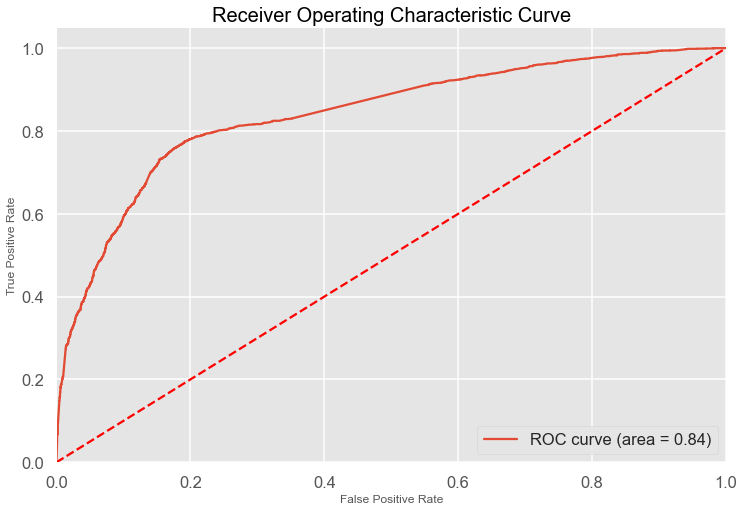

In [483]:
#Call the function

x_org_roc(y_train_pred_final2.Converted, y_train_pred_final2.Converted_probability)

#### Observations from the above RFE2 models: The area under the curve for RFE2 is also 84% of the total

#### 6.1.3 Optimal Cut Off point for RFE

In [484]:
# We will choose one cut off point from the many created

x_num2=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in x_num2:
    y_train_pred_final2[i]=y_train_pred_final2['Converted_probability'].map(lambda x:1 if x > i else 0) 
y_train_pred_final2.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2873,1,0.8146,2873,1,1,1,1,1,1,1,1,1,0
6823,1,0.8253,6823,1,1,1,1,1,1,1,1,1,0
7258,0,0.1906,7258,1,1,0,0,0,0,0,0,0,0
8327,1,0.7517,8327,1,1,1,1,1,1,1,1,0,0
5940,0,0.0421,5940,1,0,0,0,0,0,0,0,0,0


#### 6.1.4  RFE-2 calculate 'Sensitivity', 'Accuracy', and 'Specificity' for each of these points to measure the relevance of the data points

In [485]:
# Create a dataset to store all the values,which are to be created

x_cutoffs2=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# Range = 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

# creating confusion matrix,take a sum, Store Accuracy,Senstivity,Specificity, Append all into the dataset

for i in var:
    cnf_matrix2=confusion_matrix(y_train_pred_final2['Converted'],y_train_pred_final2[i])  
    total=sum(sum(cnf_matrix2))                                                         
    accuracy=(cnf_matrix2[0,0]+cnf_matrix2[1,1])/total                                     
    sensitivity=cnf_matrix2[1,1]/(cnf_matrix2[1,0]+cnf_matrix2[1,1])                       
    specificity=cnf_matrix2[0,0]/(cnf_matrix2[0,0]+cnf_matrix2[0,1])                        
    x_cutoffs2.loc[i]=[i, accuracy, sensitivity, specificity]                        
print(x_cutoffs2) 

        Probability  Accuracy  Sensitvity  Specificity
0.0000       0.0000    0.3765      1.0000       0.0000
0.1000       0.1000    0.4365      0.9933       0.1003
0.2000       0.2000    0.7323      0.8233       0.6774
0.3000       0.3000    0.7951      0.7753       0.8070
0.4000       0.4000    0.8016      0.7265       0.8468
0.5000       0.5000    0.7903      0.6395       0.8814
0.6000       0.6000    0.7770      0.5435       0.9180
0.7000       0.7000    0.7540      0.4308       0.9492
0.8000       0.8000    0.7322      0.3319       0.9738
0.9000       0.9000    0.6950      0.2049       0.9909


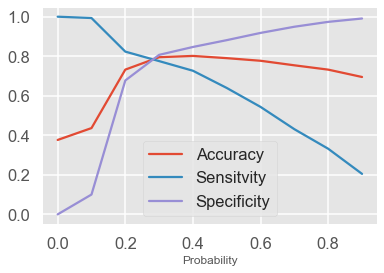

In [486]:
# Plot 'Accuracy' , 'Sensitivity' and 'Specificity' for all probabilities

x_cutoffs2.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

#### It is evident that, it is strongly pointing at <font color=brown> 0.30.
     It is now the optimum point for taking probability cutoff

In [487]:
# Predicting the outcomes cutoff as 0.3

y_train_pred_final2['Predicted']=y_train_pred_final2['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )

y_train_pred_final2.head(10)

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
2873,1,0.8146,2873,1,1,1,1,1,1,1,1,1,0,1
6823,1,0.8253,6823,1,1,1,1,1,1,1,1,1,0,1
7258,0,0.1906,7258,1,1,0,0,0,0,0,0,0,0,0
8327,1,0.7517,8327,1,1,1,1,1,1,1,1,0,0,1
5940,0,0.0421,5940,1,0,0,0,0,0,0,0,0,0,0
5686,1,0.8835,5686,1,1,1,1,1,1,1,1,1,0,1
5372,1,0.8318,5372,1,1,1,1,1,1,1,1,1,0,1
4736,0,0.0680,4736,1,0,0,0,0,0,0,0,0,0,0
5812,1,0.9971,5812,1,1,1,1,1,1,1,1,1,1,1
893,0,0.6887,893,1,1,1,1,1,1,1,0,0,0,1


In [488]:
# Create confusion matrix to find precision and recall score

x_confusion2=confusion_matrix(y_train_pred_final2.Converted,y_train_pred_final2.Predicted)
x_confusion2

array([[3177,  760],
       [ 534, 1843]], dtype=int64)

#### 6.1.5 Precision and Recall

In [489]:
# Print Pecision score
print('Precision',x_confusion2[1,1]/(x_confusion2[0,1]+x_confusion2[1,1]))
# Print Recall score
print('Recall',x_confusion2[1,1]/(x_confusion2[1,0]+x_confusion2[1,1]))       

Precision 0.708029197080292
Recall 0.7753470761464031


### Observation from RFE Test-1 & RFE Test-2
Important points to be drawn from both tests -

1. Both the final models from RFE1&2 have 0.84 ROC curve plot.
2. Both the final models from RFE1&2 have 0.3 as optimal cutt off point
3. RFE1 Final model has higher num of variables to decide from RFE2.
4. However, Recall, Precision is closer in RFE2 and Specificity is better as well
4. RFE1 has 0.7863 whereas RFE2 has 0.7753 sensitivity.

#### RF1 & RFE2 has almost similar metrics,  RFE1 model has higher senstivity.
#### <font color=brown> We will proceed with RFE1 model.

### Step7: Prediction on the Test set

In [490]:
# Scalling the variables with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [491]:
# Predicting the test dataset with our final RFE1 model

x_test_cols1=X_train_6.columns[1:]             
X_test_final=X_test[x_test_cols1]               
X_test_final=sm.add_constant(X_test_final)   
y_pred_test=reg6.predict(X_test_final) 

In [492]:
# Saving prediction values into the new data set

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()  

,Converted,Converted_Probability,ID
5130,0,0.0534,5130
6929,0,0.2632,6929
1484,0,0.0041,1484
6519,0,0.6819,6519
7472,1,0.6394,7472


#### 7.1.0 Evaluation on the test set

In [493]:
# Predict the final RF2 Model outcomes outcomes cutoff point as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
5130,0,0.0534,5130,0
6929,0,0.2632,6929,0
1484,0,0.0041,1484,0
6519,0,0.6819,6519,1
7472,1,0.6394,7472,1


In [494]:
# Print Accuracy on the test set
print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # 

Accuracy score in predicting test dataset : 0.786770140428677


In [495]:
# Create a confusion matrix

x_confusion3=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
x_confusion3

array([[1297,  361],
       [ 216,  832]], dtype=int64)

In [496]:
#True positive
TP=x_confusion3[1,1]
#True negative
TN=x_confusion3[0,0]
#False Positive
FP=x_confusion3[0,1]
#False Negative
FN=x_confusion3[1,0]

##### Sensitivity

In [497]:
#Sensitivity for our Test model
TP/float(TP+FN)

0.7938931297709924

##### Specificity

In [498]:
#Specificity for our Test model
TN/float(TN+FP)

0.7822677925211098

##### False positive rate

In [499]:
#Cal False positive rate for our test model
print(FP/float(TN+FP))

0.21773220747889022


##### Positive predictive value

In [500]:
#Cal Positive predictive value for our test model
print(TP/float(TP+FP))

0.6974015088013411


##### Negative predictive value

In [501]:
#Cal Negative predictive value for our test model
print(TN/float(TN+FN))

0.8572372769332453


##### Precision and Recall on the test set

In [502]:
# Print Precision and Recall on the test set

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))  

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      


Precision score in predicting test dataset: 0.6974015088013411
Recall score in predicting test dataset: 0.7938931297709924


In [503]:
# Creating new columns for lead number and lead score
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Score
5130,0,0.0534,5130,0,5
6929,0,0.2632,6929,0,26
1484,0,0.0041,1484,0,0
6519,0,0.6819,6519,1,68
7472,1,0.6394,7472,1,64


#### Conclusion:

1. #### Train Set: 
   #### <font color=brown>Accuracy - 0.78
   #### <font color=brown>Sensitivity - 0.78
   #### <font color=brown>Precision - 0.68
   #### <font color=brown>Recall- 0.79
    
   #### Test Set: 
   #### <font color=brown>Accuracy - 0.79
   #### <font color=brown>Sensitivity - 0.79
   #### <font color=brown>Precision - 0.69
   #### <font color=brown>Recall- 0.79
    
   #### From above results, we can conclude that Accuracy, Sensitivity and Recall for Test & Train score is in aceptable range.
    
2. #### We have high recall score than precision score.
3. #### Model looks in stable condition and equipped for future predictions.
4. #### <font color=brown> Highest Significant features responsible for good conversion rate or higher probability of lead conversion are:
    - #### What is your current occupation_Working Professional
    - #### Lead Source_Welingak Website
    - #### Lead Source_Reference
    
5. #### Also, other important features  where probability of a conversion rate are:
    - #### Lead Source Google
    - #### Lead Source Olark Chat
    - #### Total Time Spent on Website

### **** End of Assignment ****